In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
os.chdir('/Users/Erin/git/moo_and_mcmc/dream')

In [5]:
traces = {}
for trace in ['a']:
    traces[trace] = [np.load('earm_mtdreamzs_3chain_covars_sampled_params_chain_0.npy')]
    for chain in range(1, 3):
        traces[trace].append(np.load('earm_mtdreamzs_3chain_covars_sampled_params_chain_'+str(chain)+'.npy'))

In [7]:
logps = {}
for trace in ['a']:
    logps[trace] = [np.load('earm_mtdreamzs_3chain_covars_logps_chain_0.npy')]
    print 'Logp of trace: ',trace,' chain: 0 = ',logps[trace][-1]
    for chain in range(1, 3):
        logps[trace].append(np.load('earm_mtdreamzs_3chain_covars_logps_chain_'+str(chain)+'.npy'))
        print 'Logp of trace: ',trace,' chain: ',chain,' = ',logps[trace][-1][-1]

Logp of trace:  a  chain: 0 =  [[-18038.20779243]
 [-15865.82590574]
 [ -6148.24302158]
 [ -6148.24302158]
 [ -6148.24302158]
 [ -3206.67770609]
 [ -3206.67770609]
 [ -3206.67770609]
 [ -3206.67770609]
 [ -3206.67770609]
 [ -3206.67770609]
 [ -3206.67770609]
 [ -3206.67770609]
 [ -1342.90192567]
 [ -1342.90192567]
 [ -1342.90192567]
 [ -1342.90192567]
 [ -1342.90192567]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]
 [  -345.72494101]


In [12]:
traces['a'][0][:,800]

array([ 0.01334165, -0.48498819, -0.48498819, -0.48498819, -0.48498819,
       -0.48265437, -0.48265437, -0.48265437, -0.48265437, -0.48265437,
       -0.48265437, -0.48265437, -0.48265437, -0.48265437, -0.48265437,
       -0.48265437, -0.48265437, -0.48265437, -0.48265437, -0.48265437,
       -0.48265437, -0.48265437, -0.48265437, -0.48265437, -0.48265437,
       -0.48265437, -0.48265437, -0.48265437, -0.48265437, -0.48265437,
       -0.48265437, -0.48265437, -0.48265437, -0.48265437, -0.48265437,
       -0.48265437, -0.48265437, -0.48265437, -0.48265437, -0.48265437,
       -0.48265437, -0.48265437, -0.48265437, -0.48265437, -0.48265437,
       -0.48265437, -0.48265437, -0.48265437, -0.48265437, -0.48265437,
       -0.48265437, -0.48265437, -0.48265437, -0.48265437, -0.48265437,
       -0.48265437, -0.48265437, -0.48265437, -0.48265437, -0.48265437,
       -0.48265437, -0.48265437, -0.48265437, -0.48265437, -0.48265437,
       -0.48265437, -0.48265437, -0.48265437, -0.48265437, -0.48

In [9]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]
for run in ['a']:
    for i, param in enumerate(model.parameters_rules()):
        param_trace_dict_a[param.name] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]

In [10]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  1  of  105  parameters.
Percent of parameters with GR below 1.2:  0.952380952381
Number of parameters with GR below 1.1:  1  of  105  parameters.
Percent of parameters with GR below 1.1:  0.952380952381


[1, 0.9523809523809524, 1, 0.9523809523809524]

100
3
100


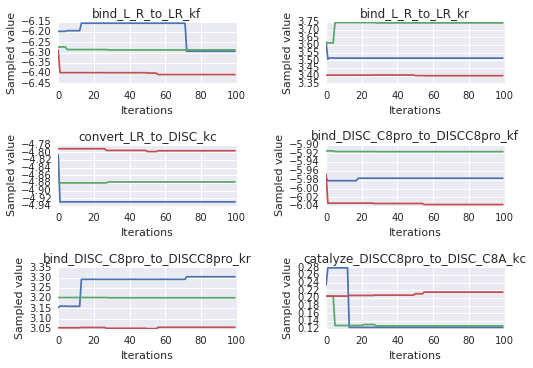

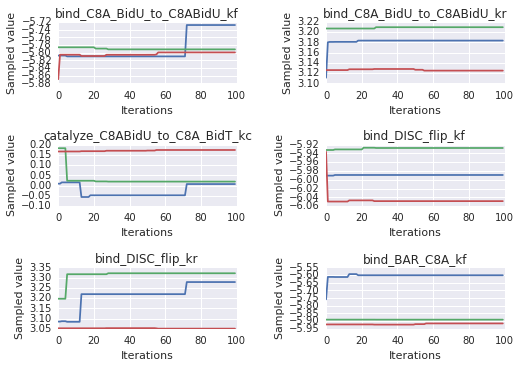

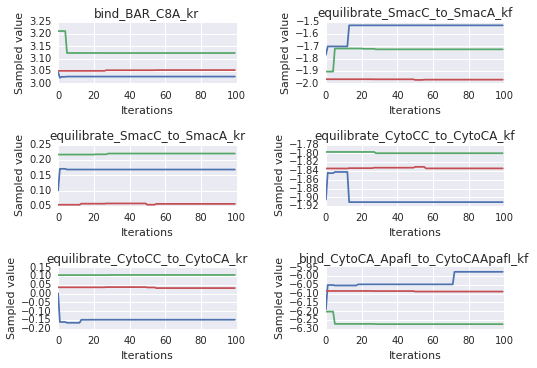

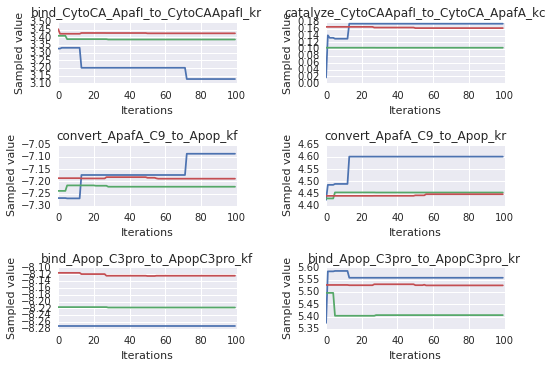

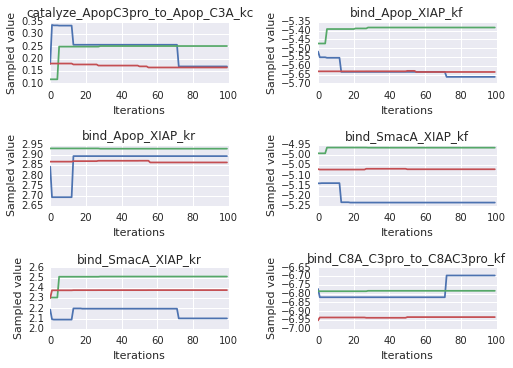

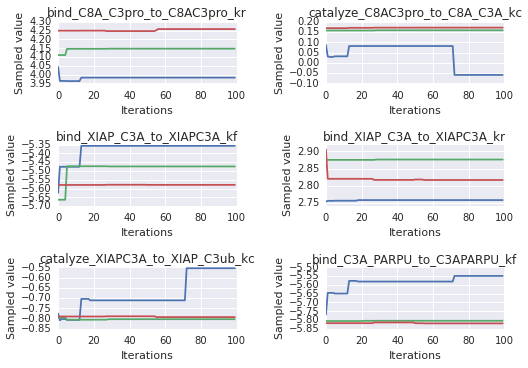

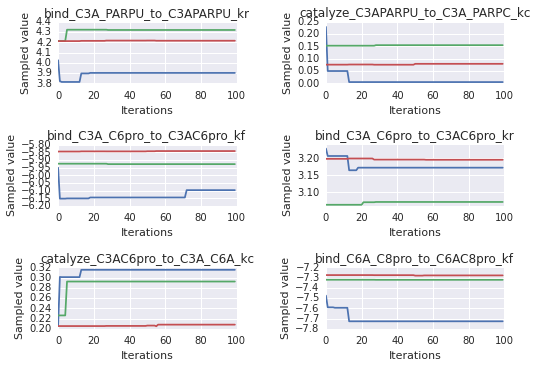

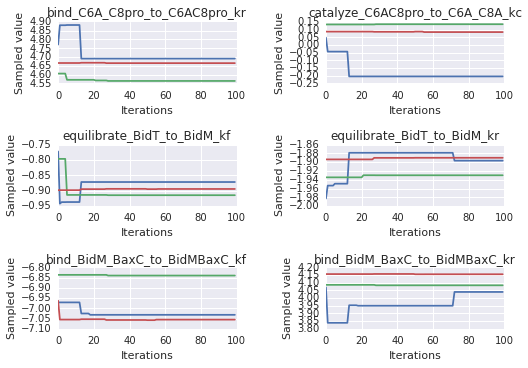

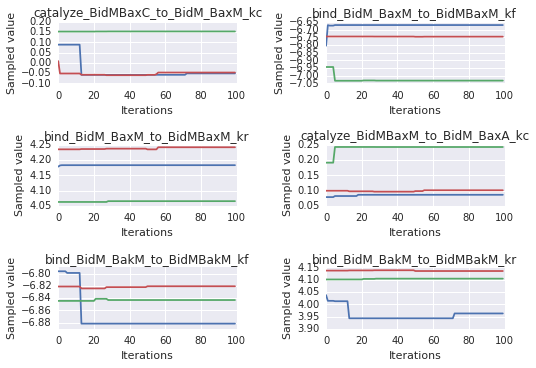

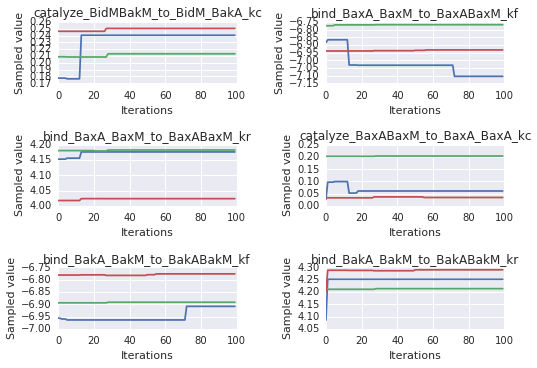

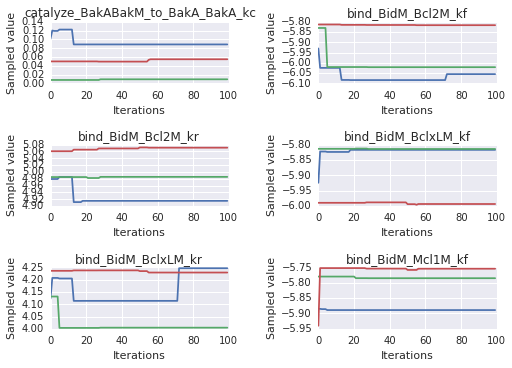

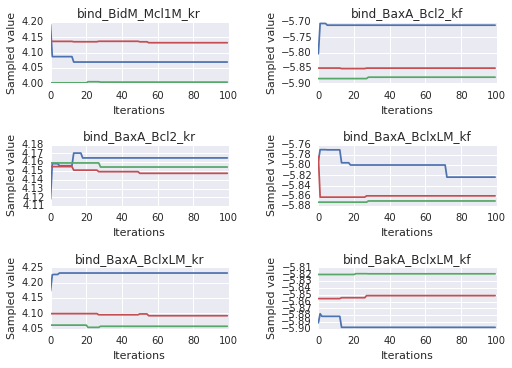

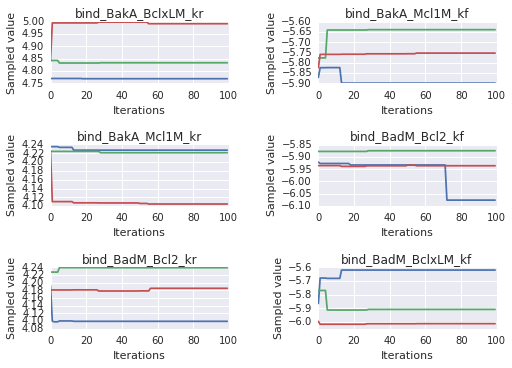

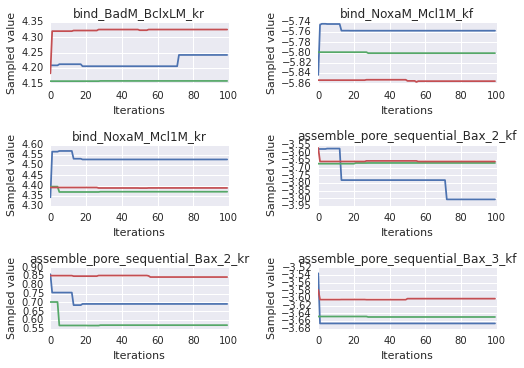

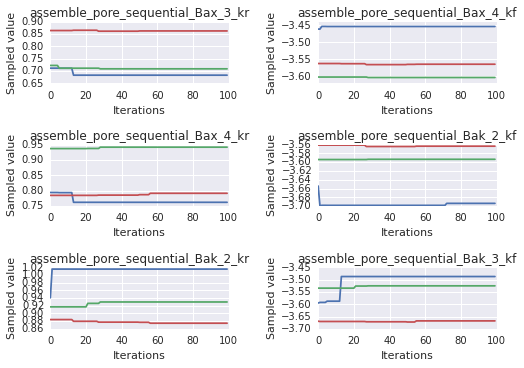

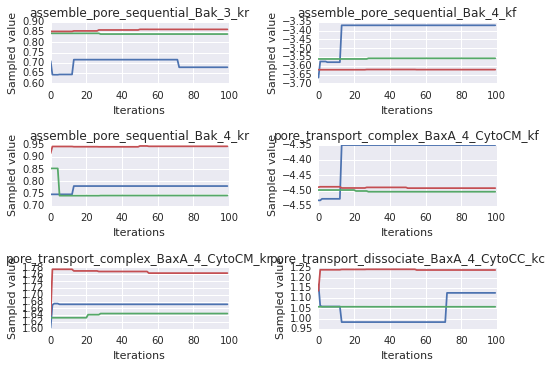

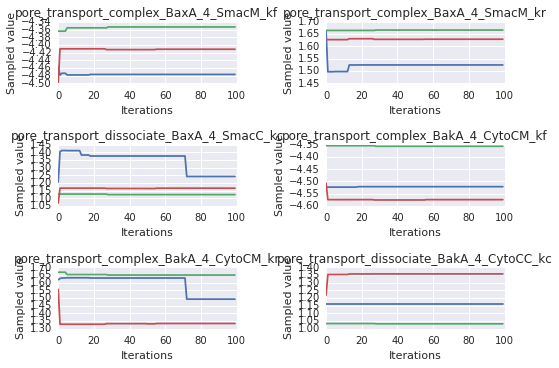

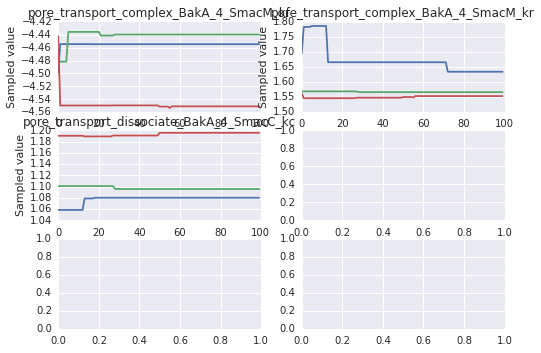

In [13]:
sample_plots(param_trace_dicts['a'])

In [11]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=600, thin=1)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


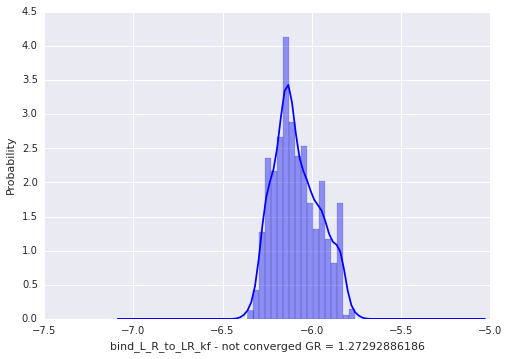

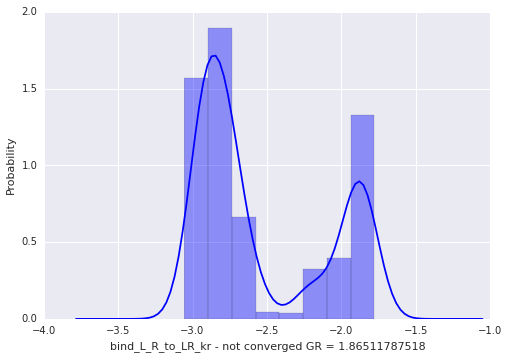

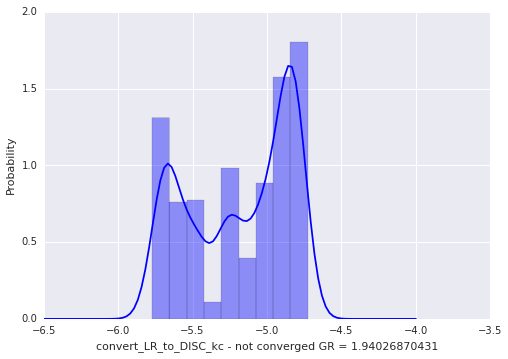

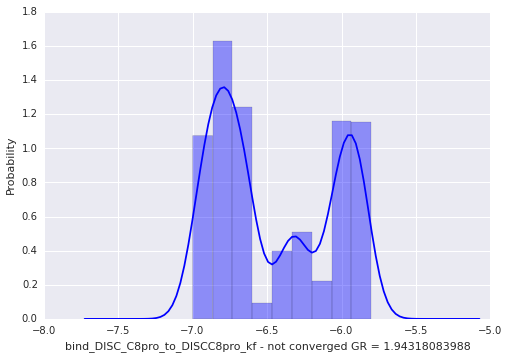

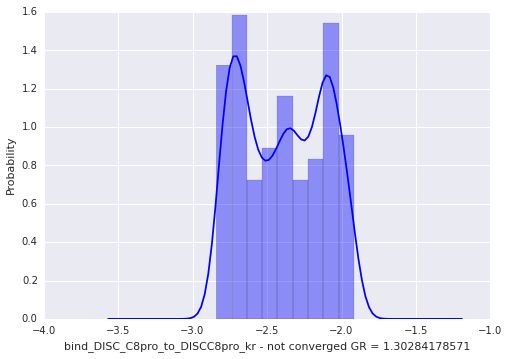

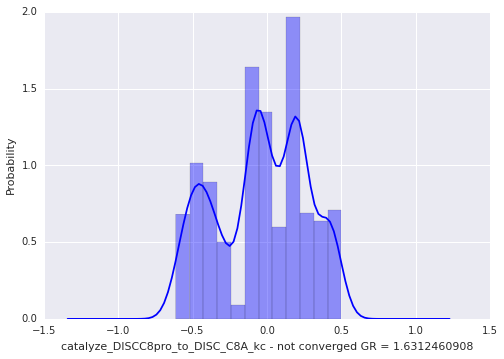

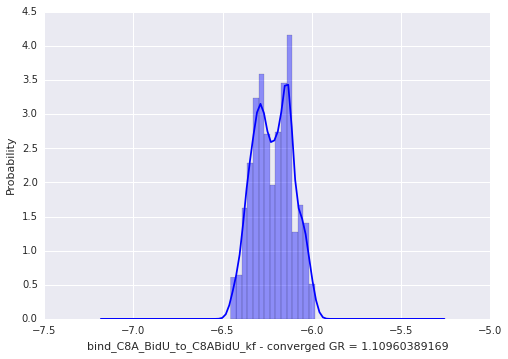

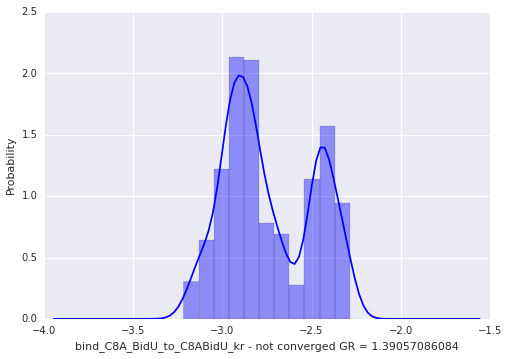

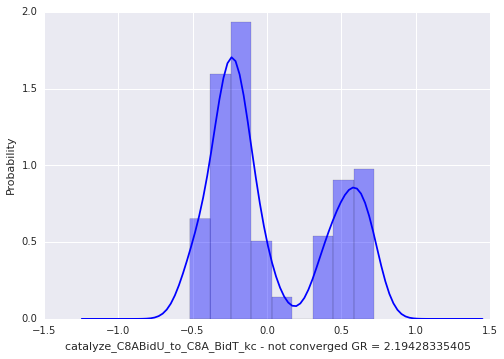

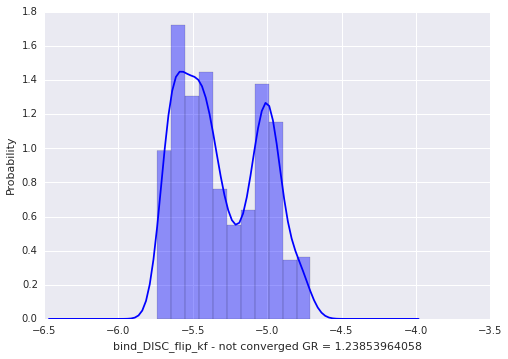

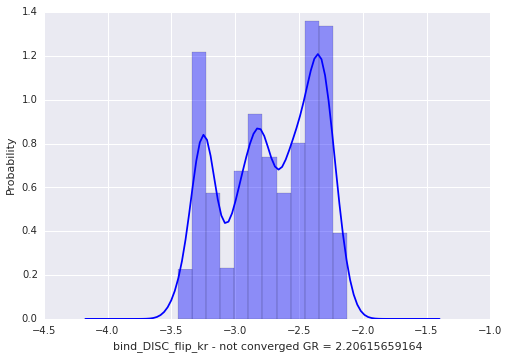

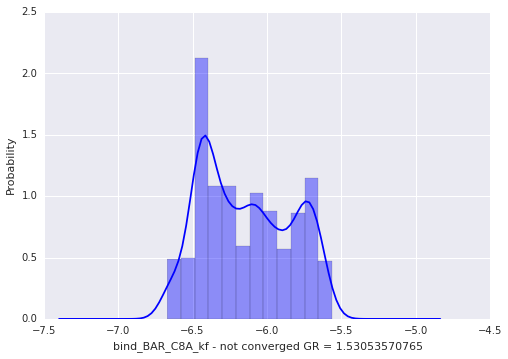

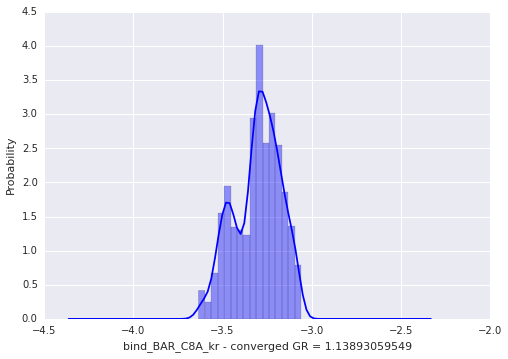

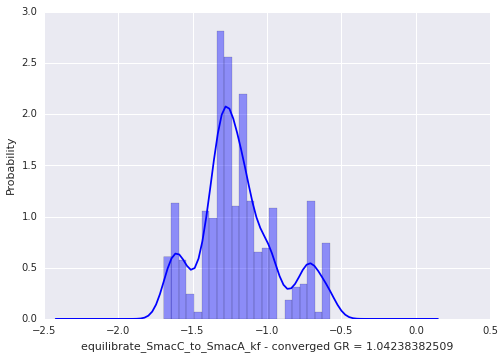

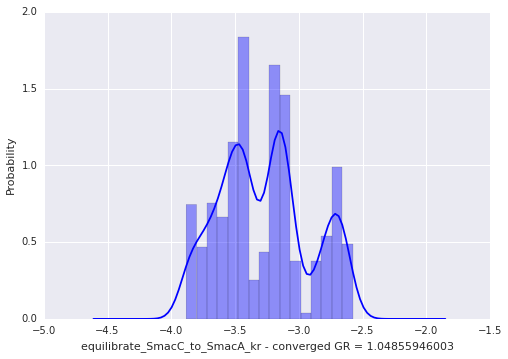

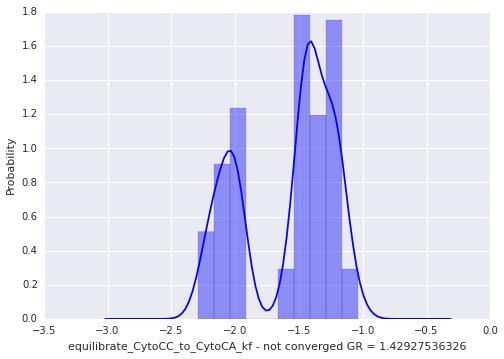

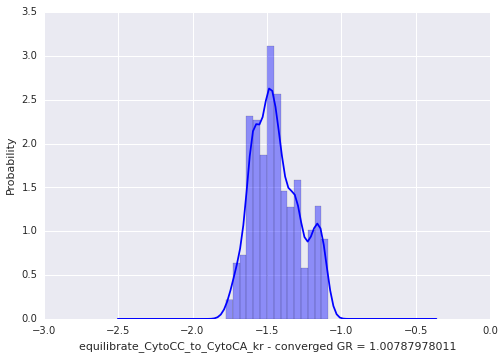

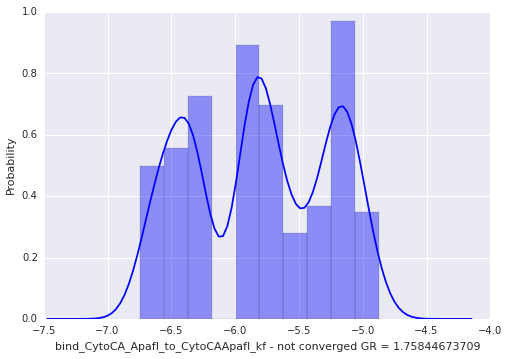

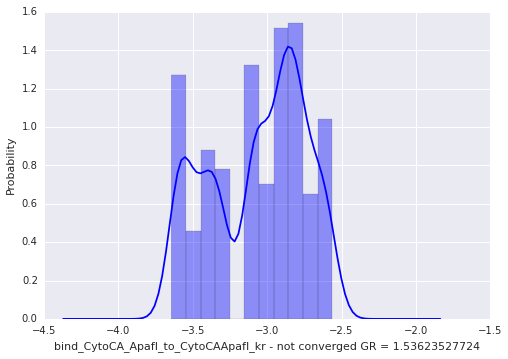

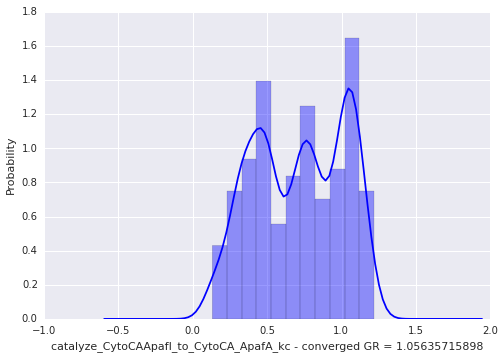

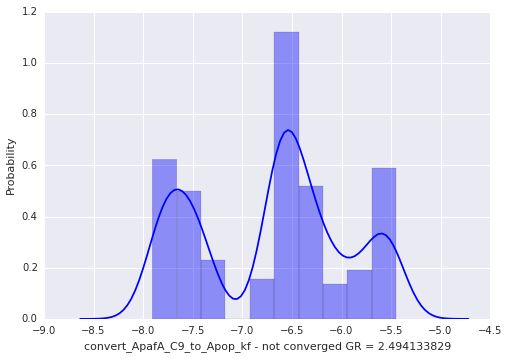

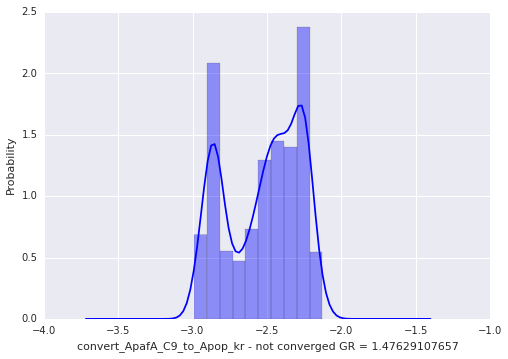

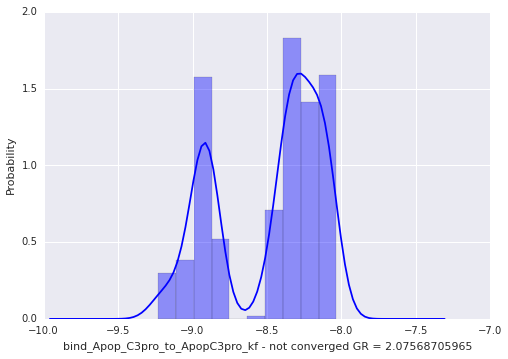

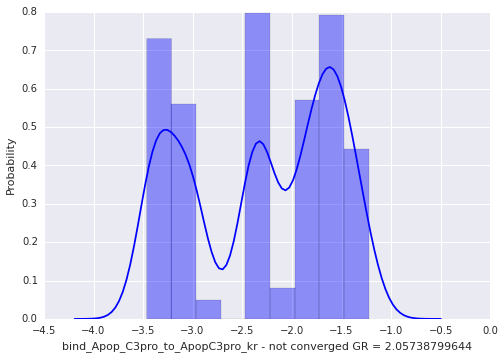

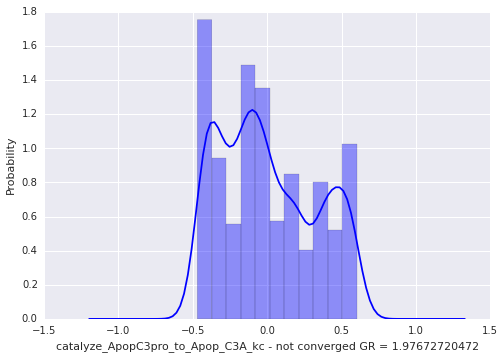

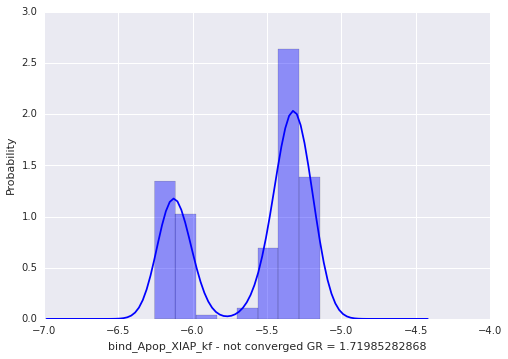

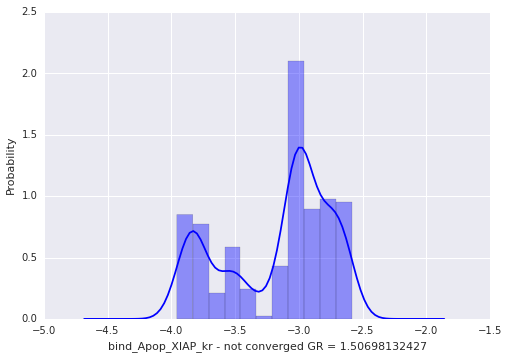

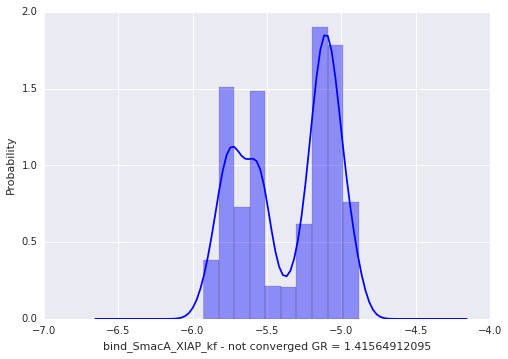

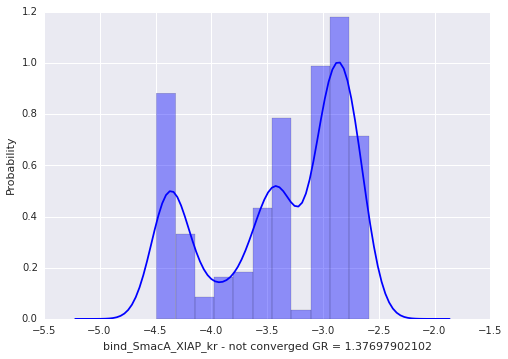

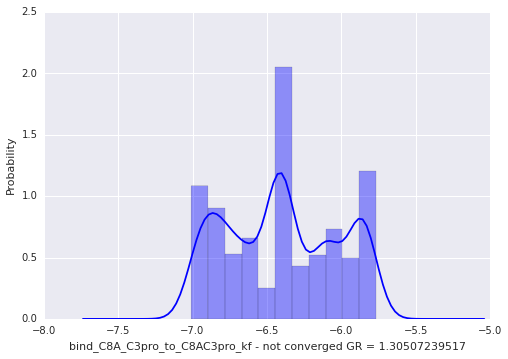

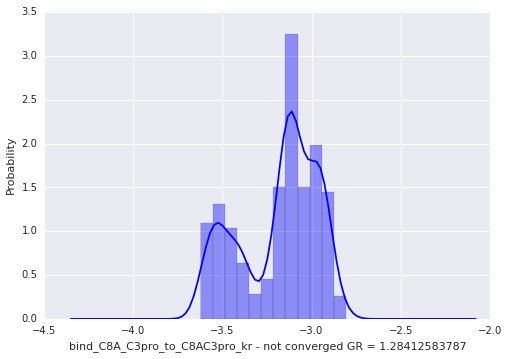

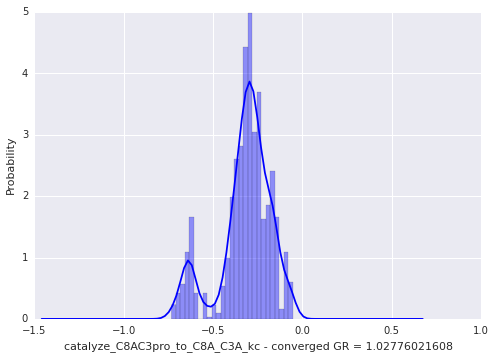

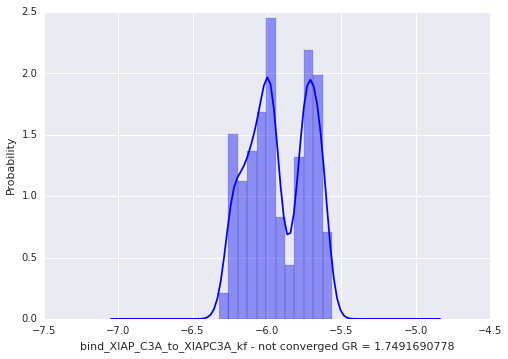

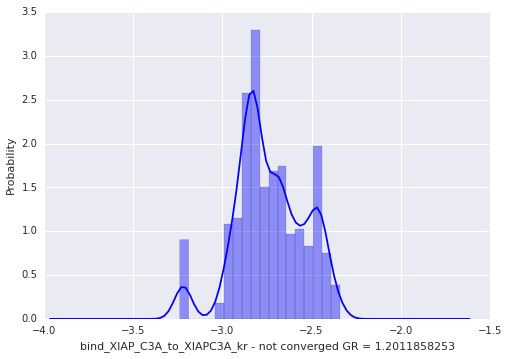

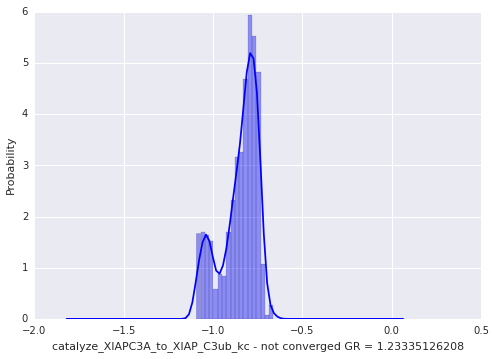

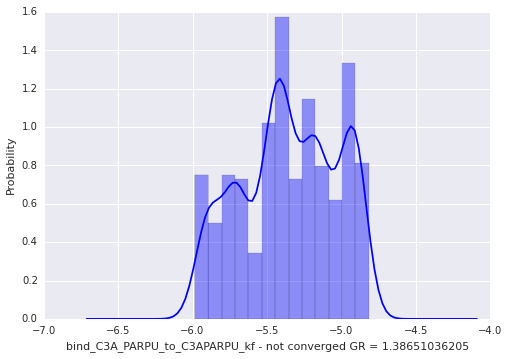

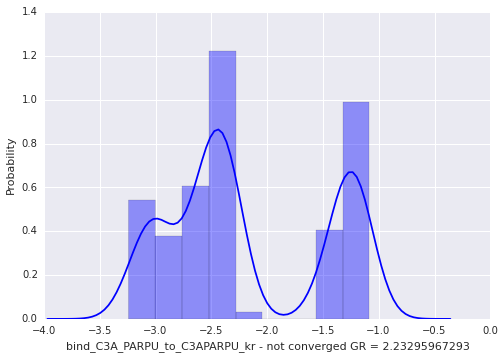

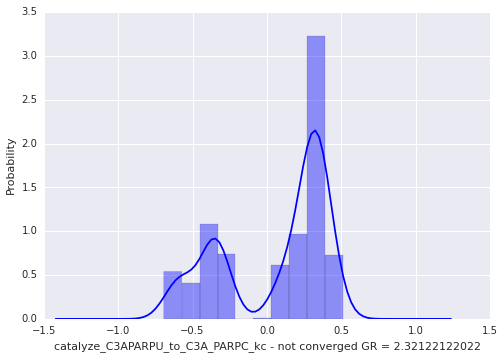

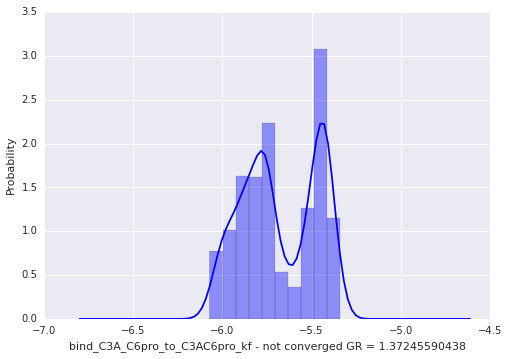

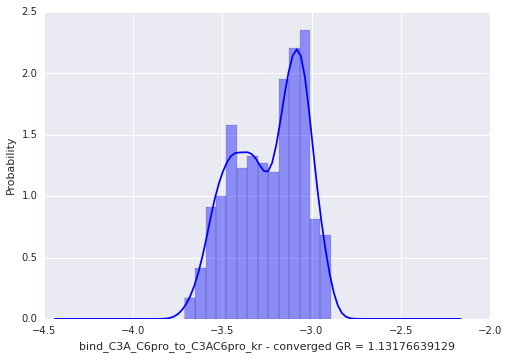

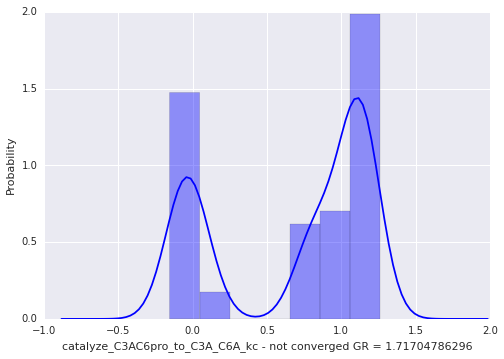

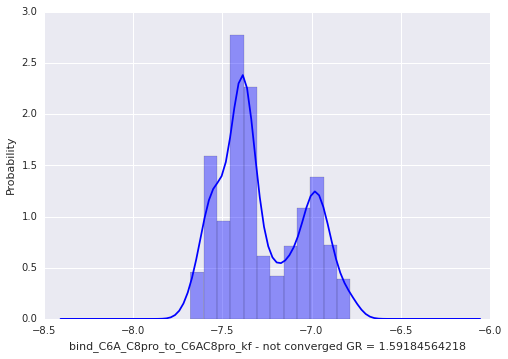

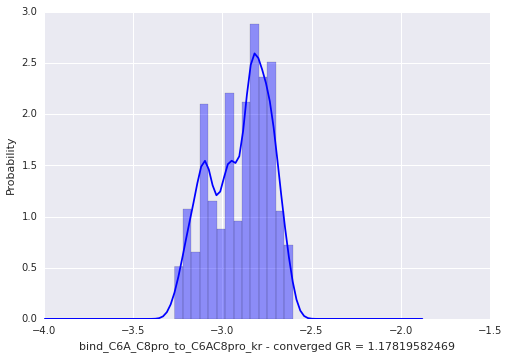

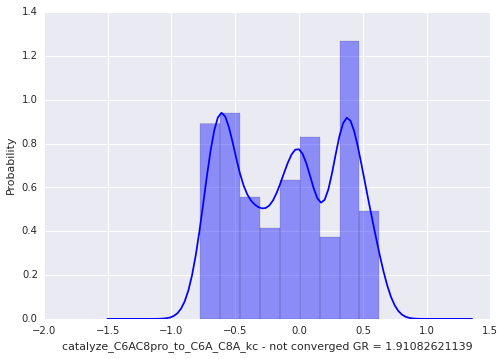

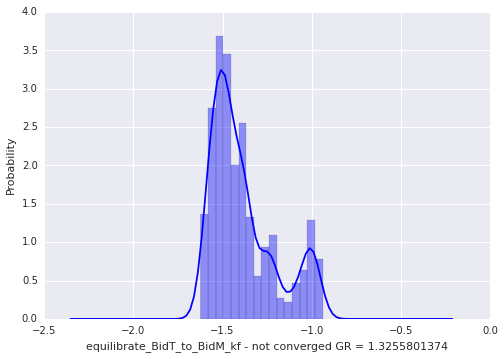

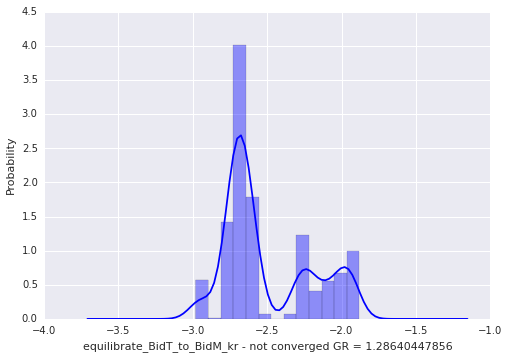

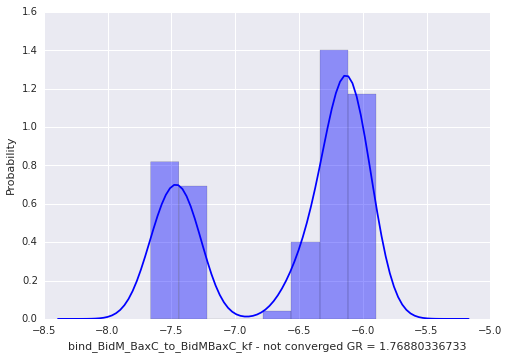

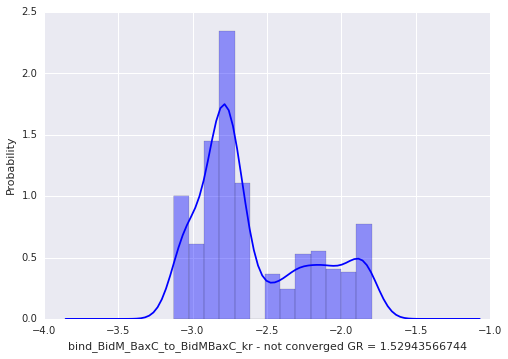

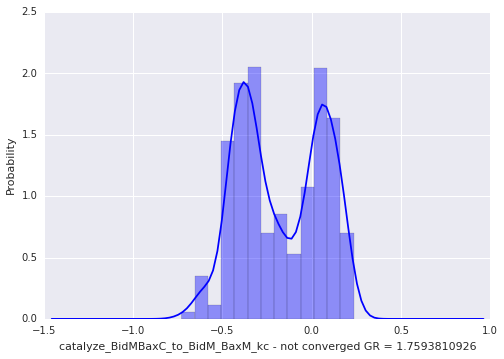

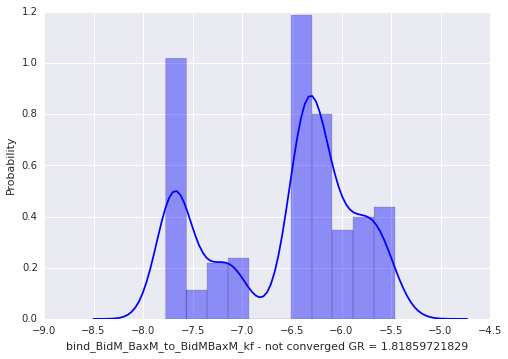

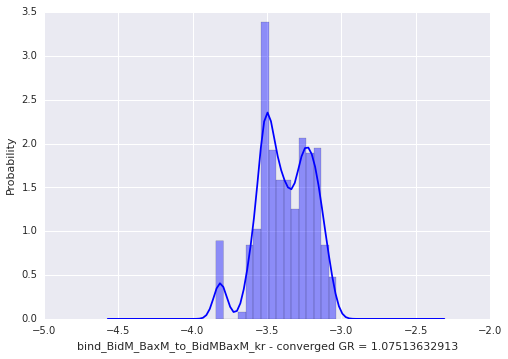

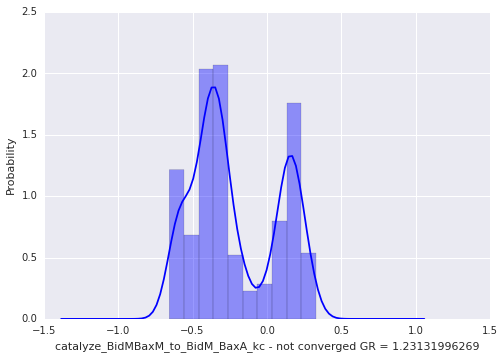

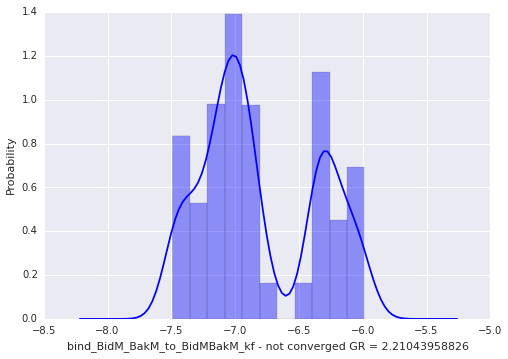

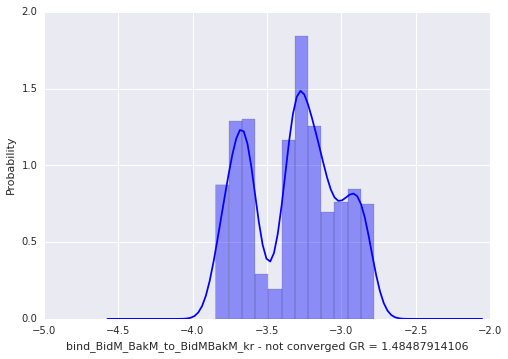

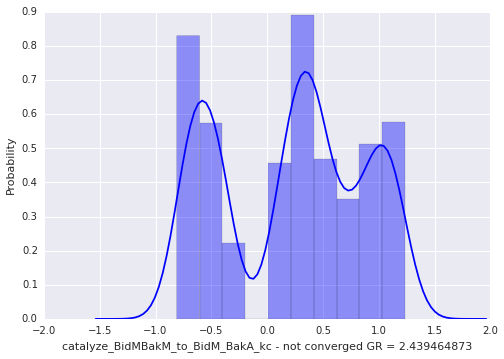

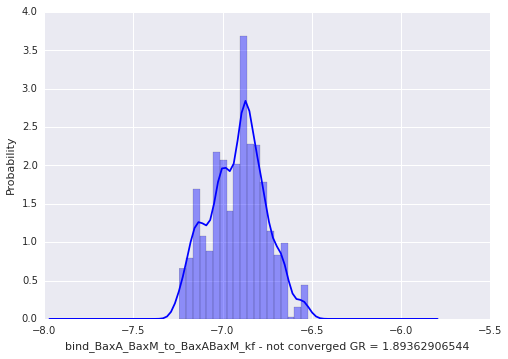

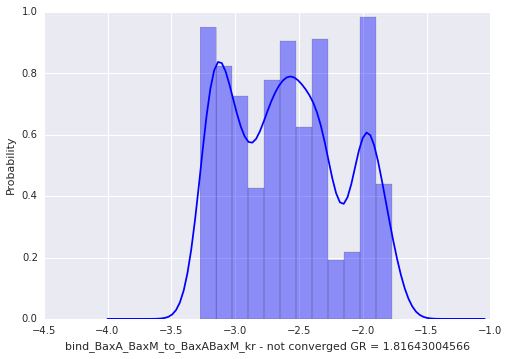

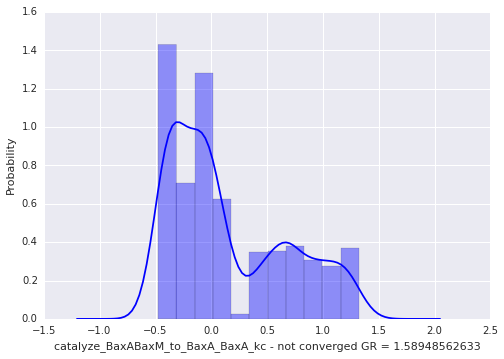

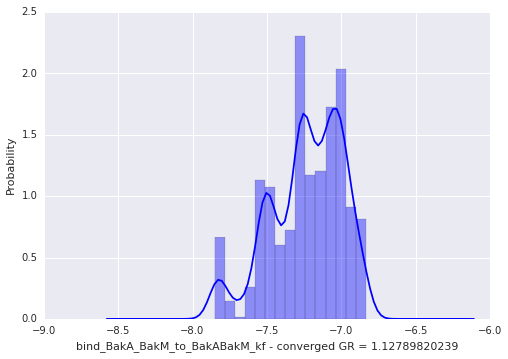

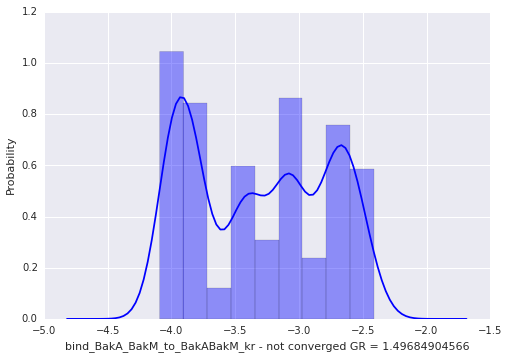

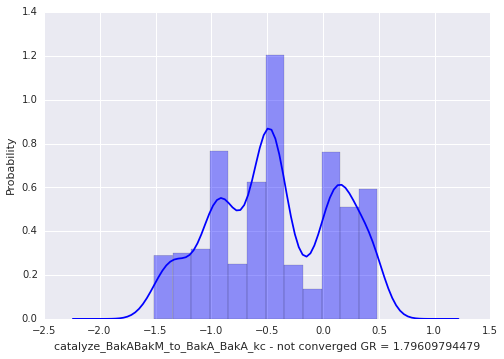

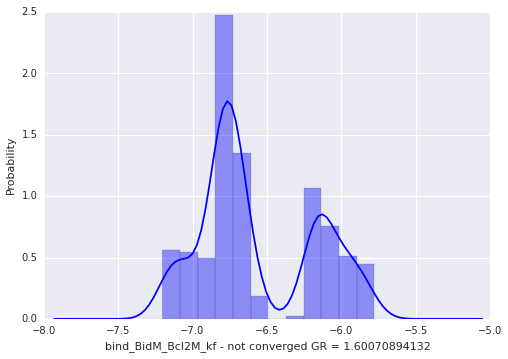

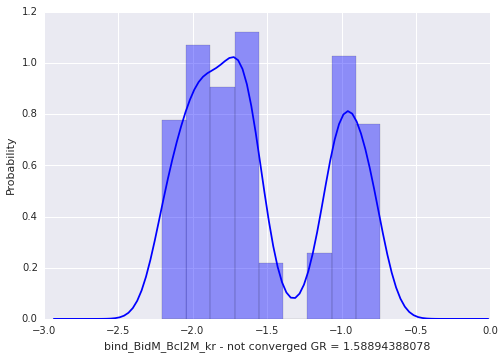

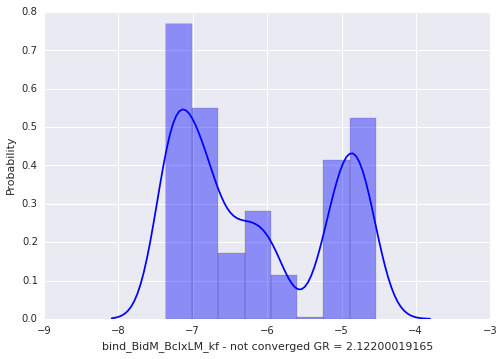

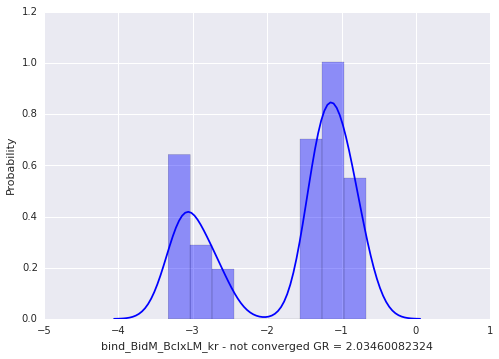

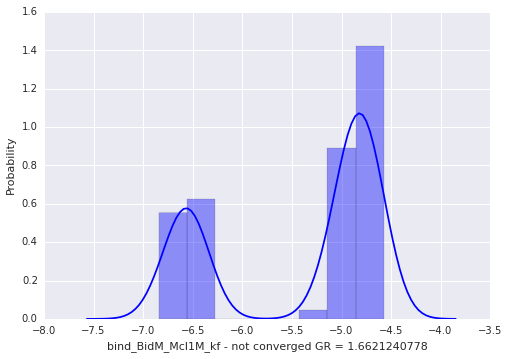

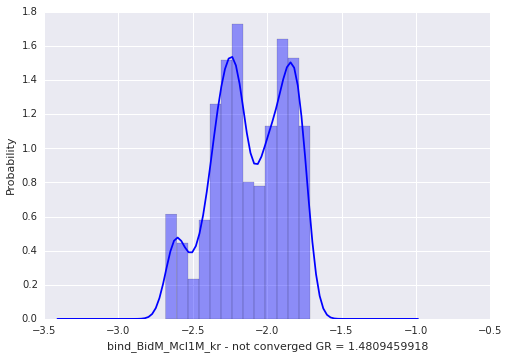

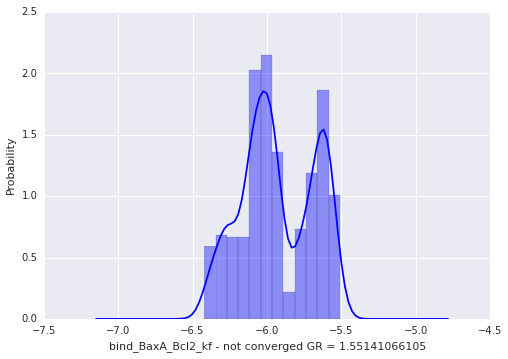

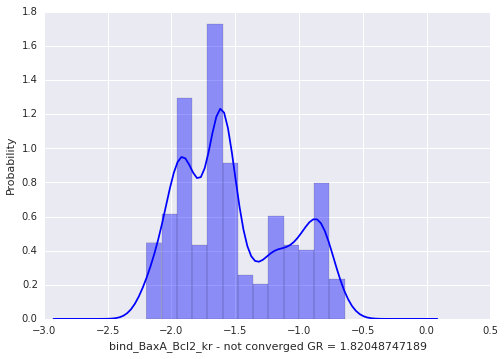

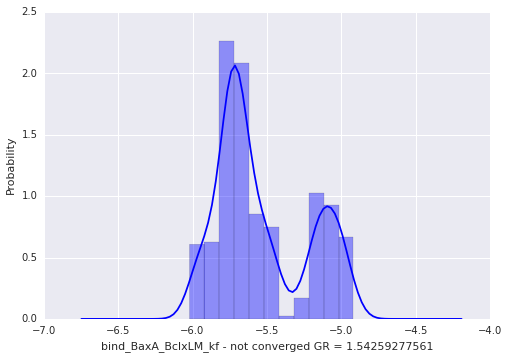

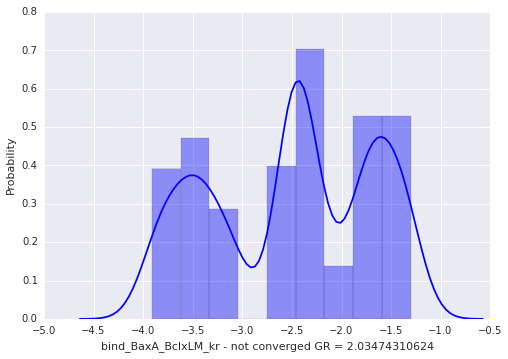

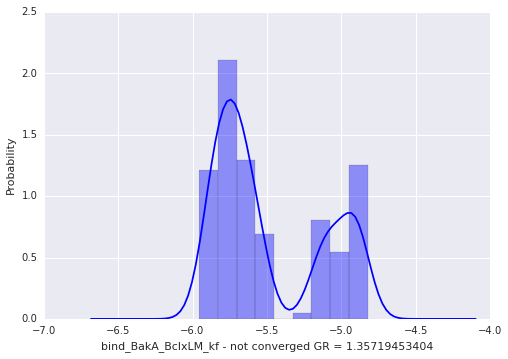

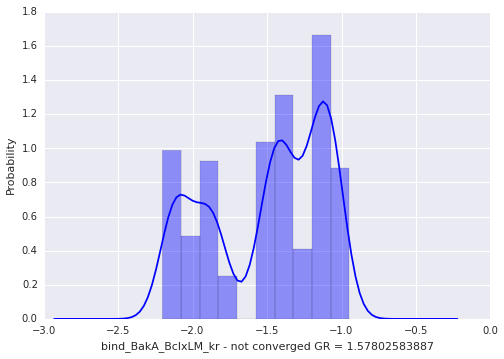

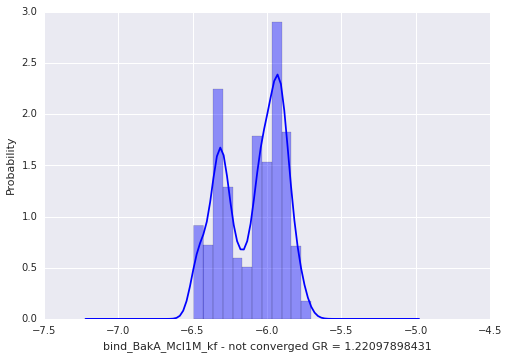

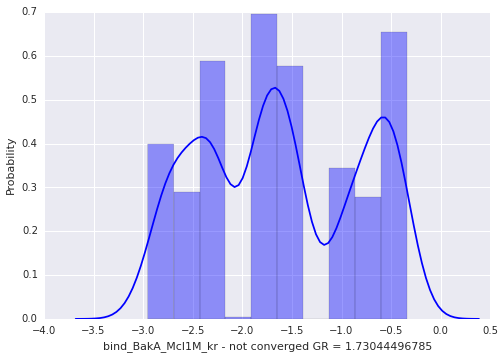

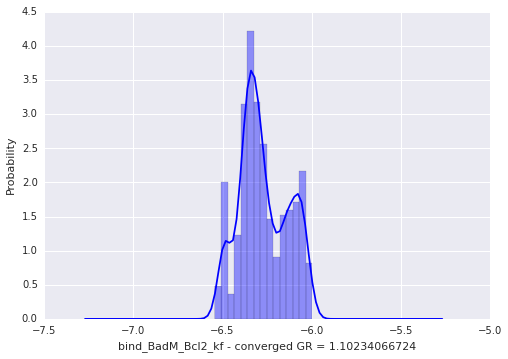

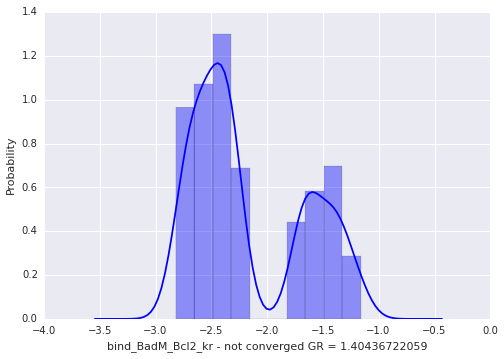

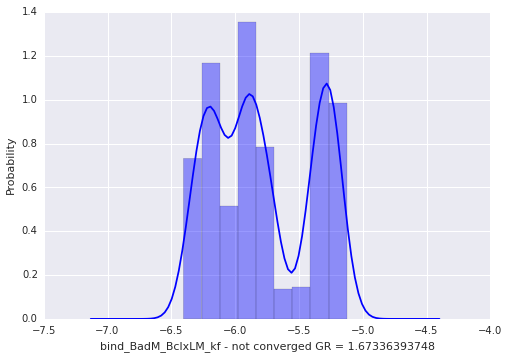

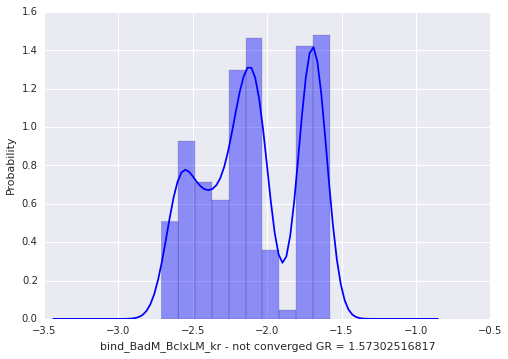

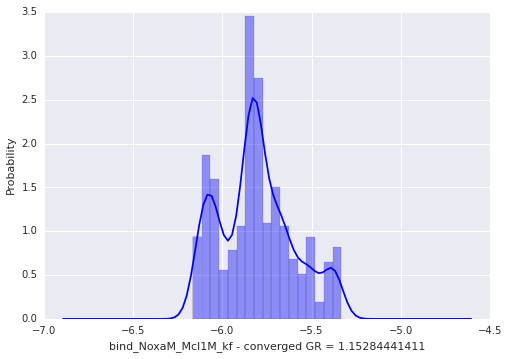

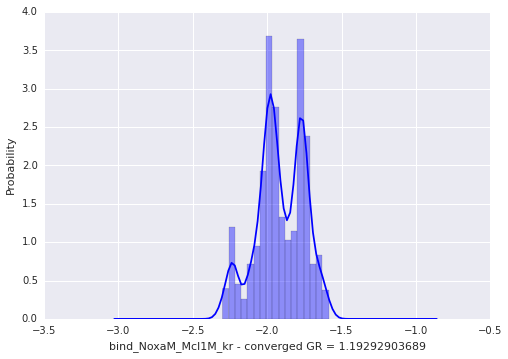

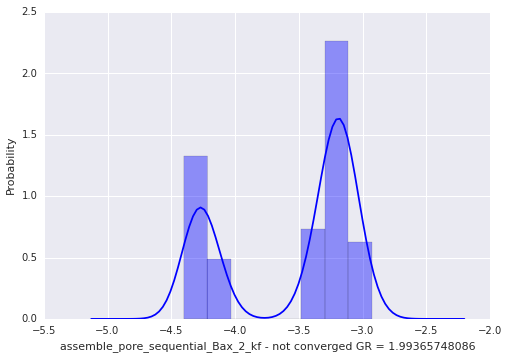

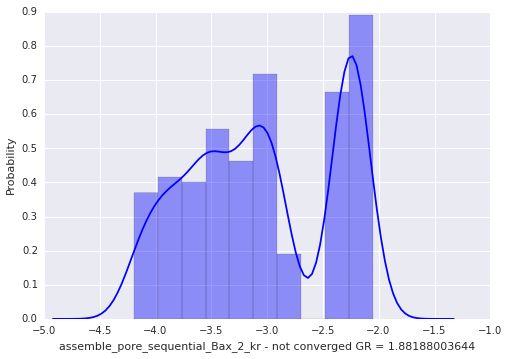

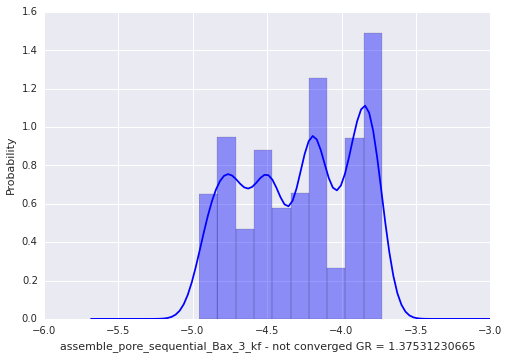

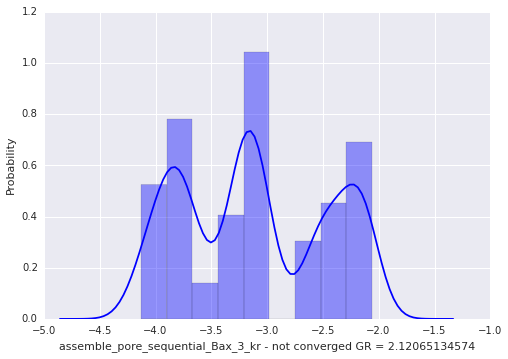

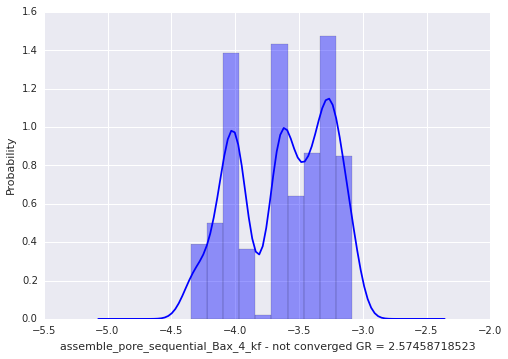

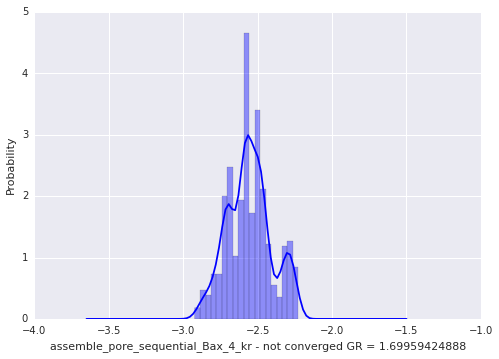

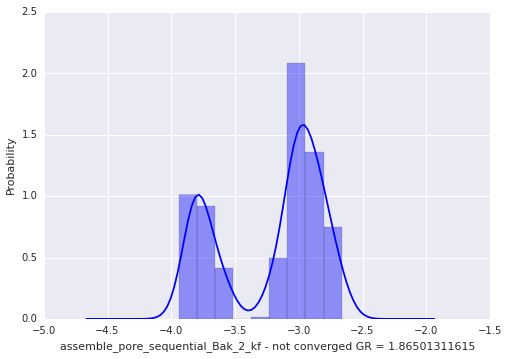

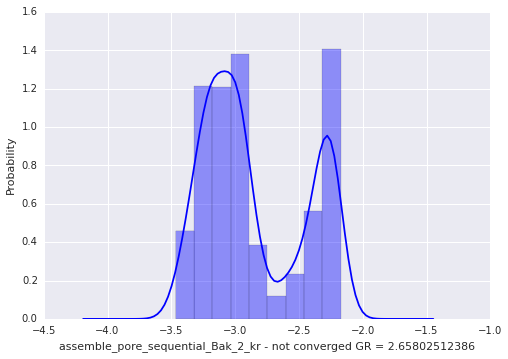

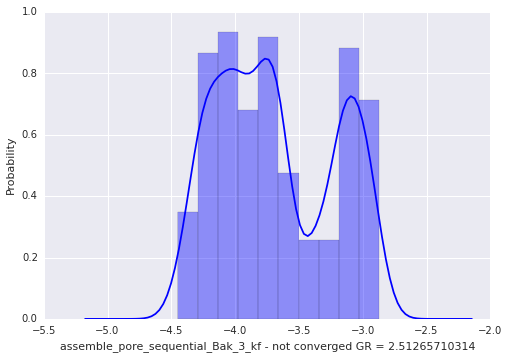

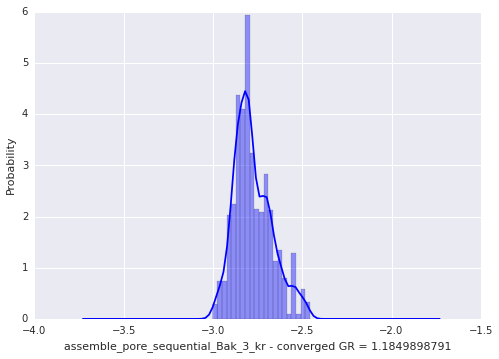

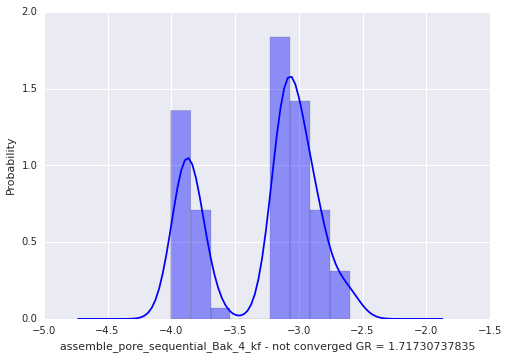

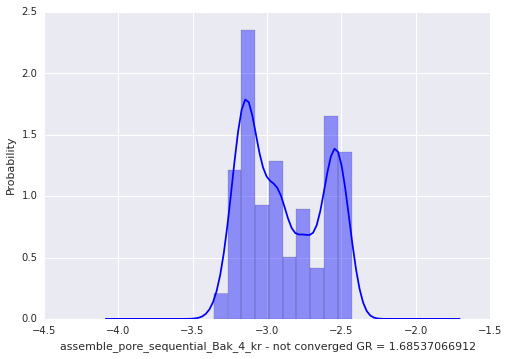

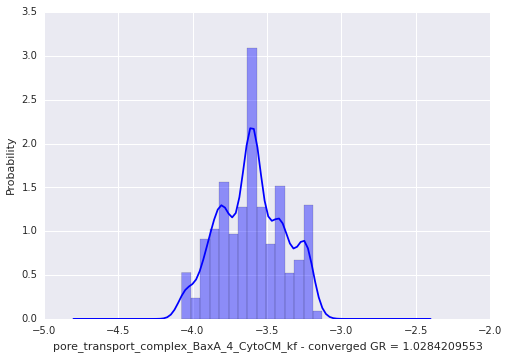

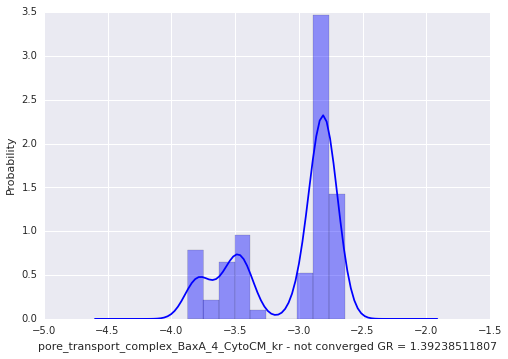

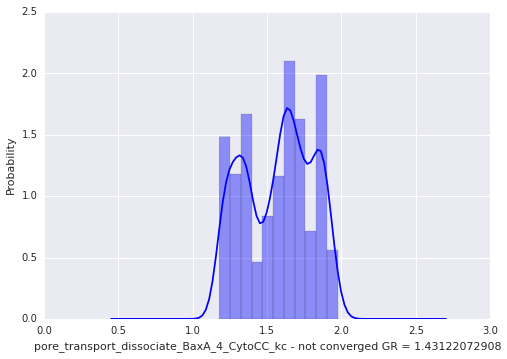

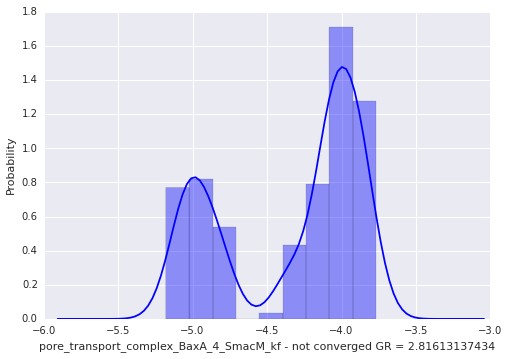

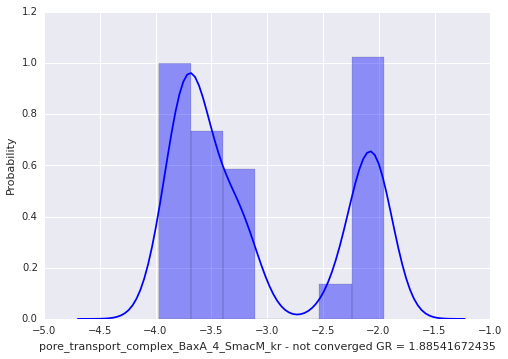

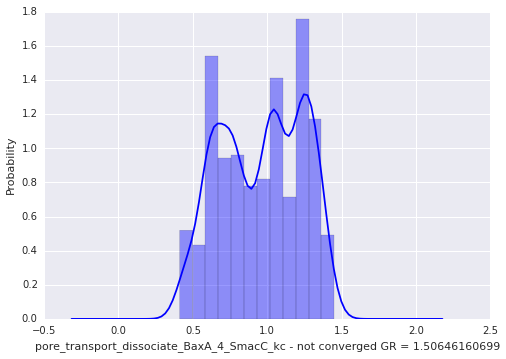

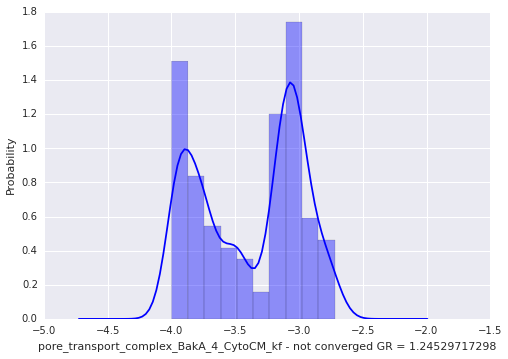

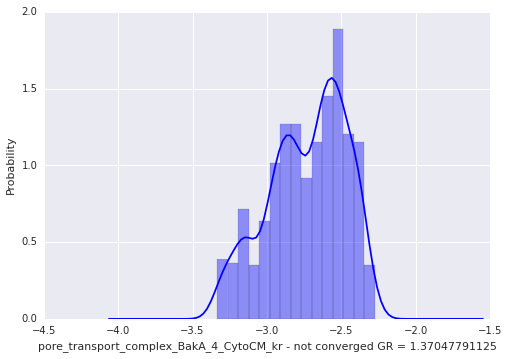

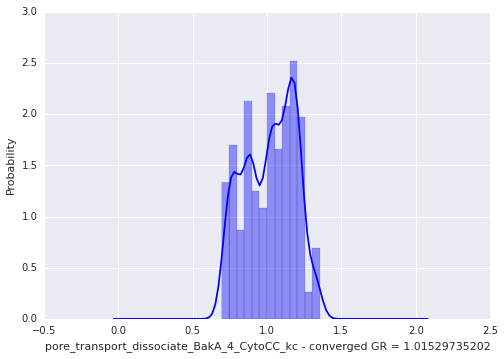

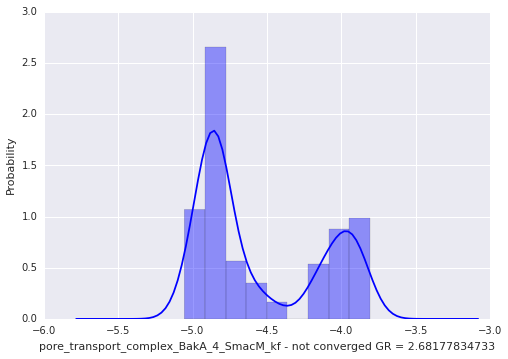

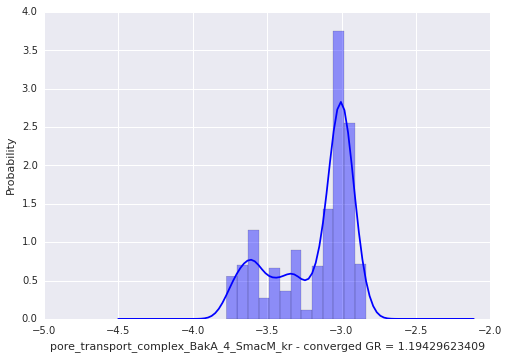

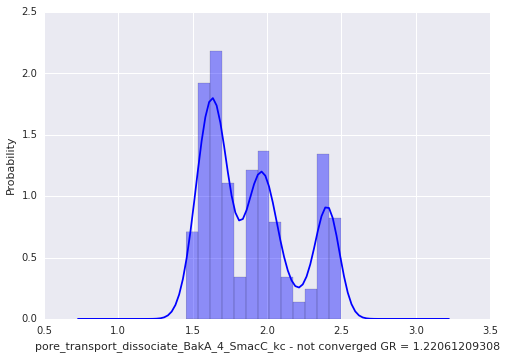

In [12]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True, color='b')
    if gelman_rubin_dicts['a'][param_name] < 1.2:
        sns.axlabel(param_name+' - converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    else:
        sns.axlabel(param_name+' - not converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')

In [14]:
traces['a'][1][:,0]

array([-6.3521298 , -6.3521298 , -6.3521298 , -6.3521298 , -6.3521298 ,
       -6.3521298 , -6.3521298 , -6.3521298 , -6.3521298 , -6.3521298 ,
       -6.3521298 , -6.3521298 , -6.33240704, -6.33240704, -6.33240704,
       -6.33240704, -6.33240704, -6.33240704, -6.33240704, -6.33240704,
       -6.33240704, -6.33240704, -6.33240704, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28

(array([-99, -98, -97, -96, -95, -94, -93, -92, -91, -90, -89, -88, -87,
        -86, -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74,
        -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61,
        -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48,
        -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35,
        -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22,
        -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,
         -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,
          5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
         18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
         31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
         44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78

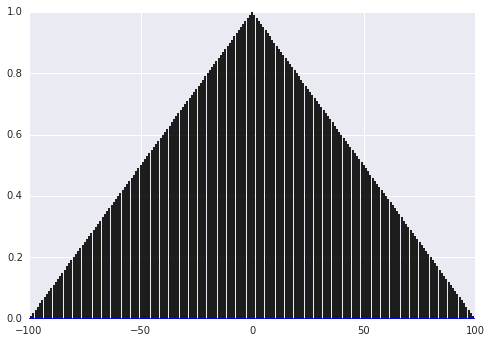

In [19]:
fig = plt.figure()
plt.acorr(traces['a'][0][:,80], maxlags=None)

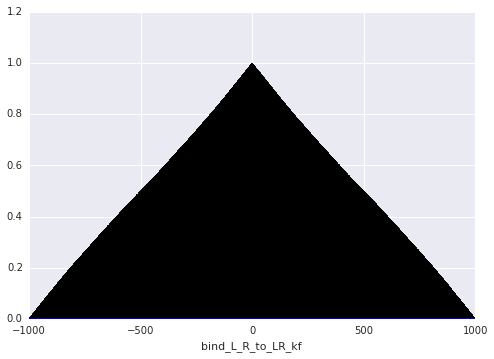

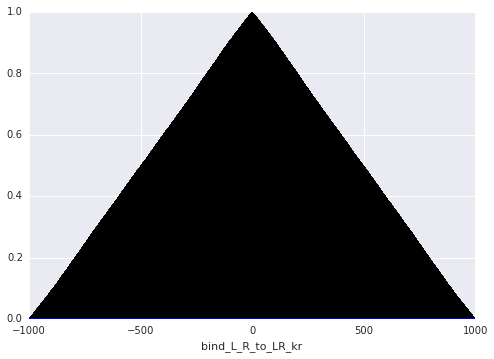

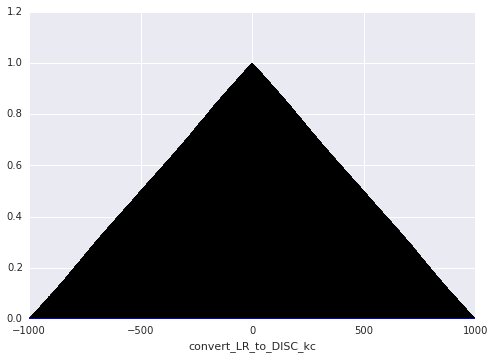

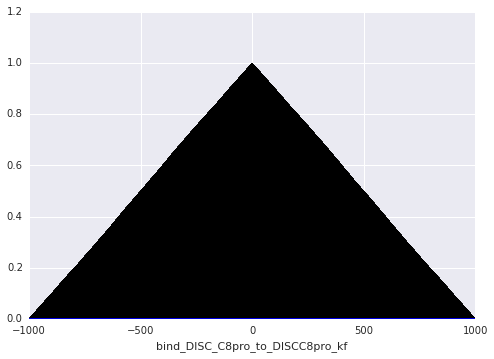

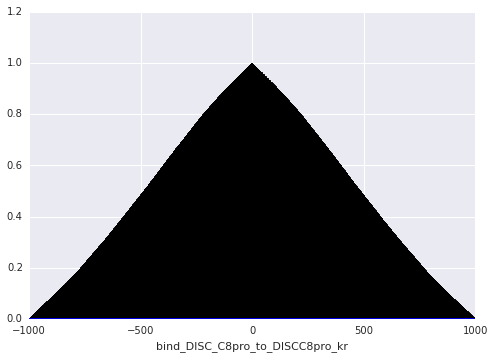

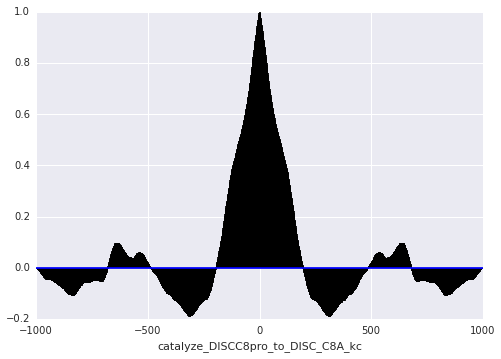

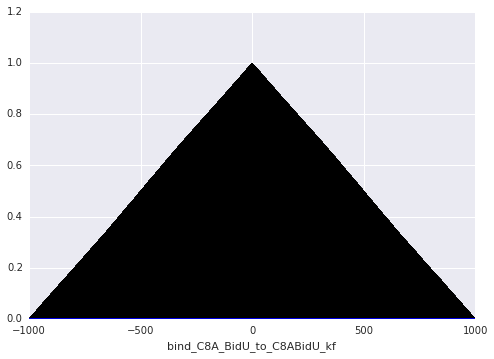

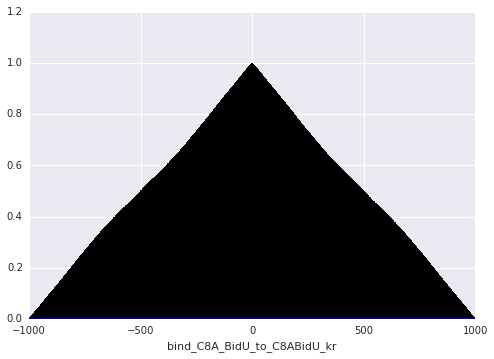

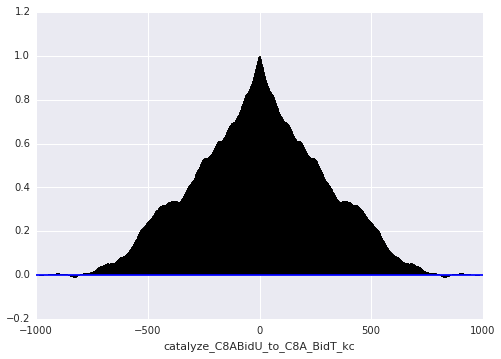

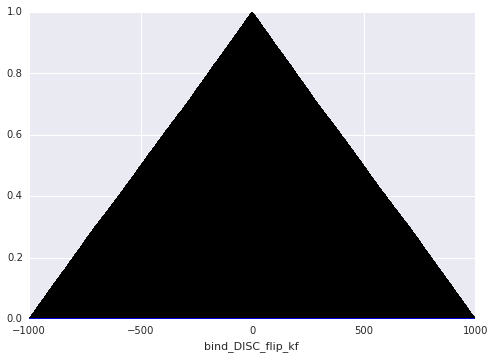

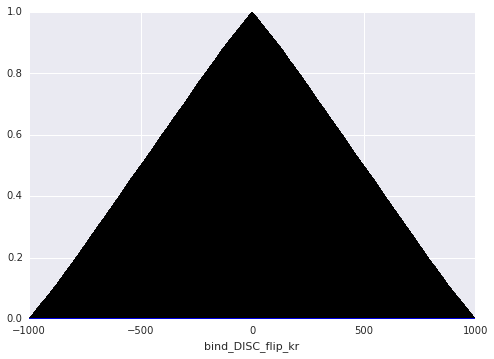

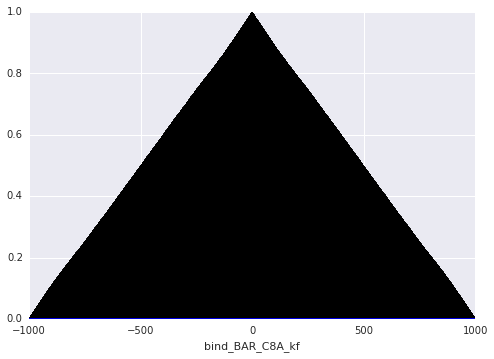

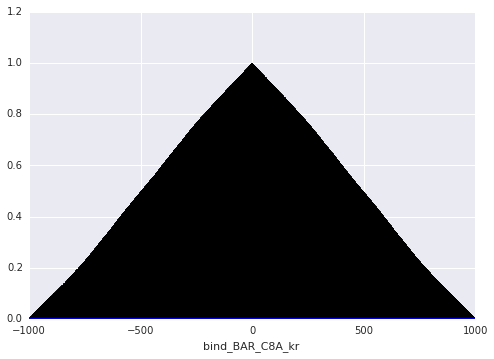

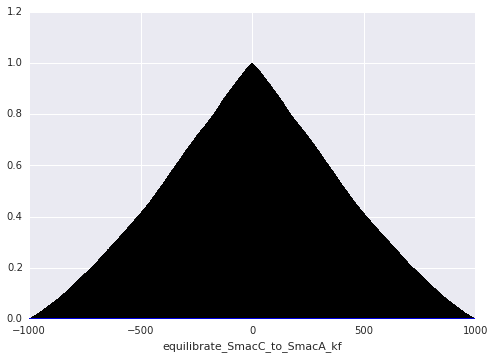

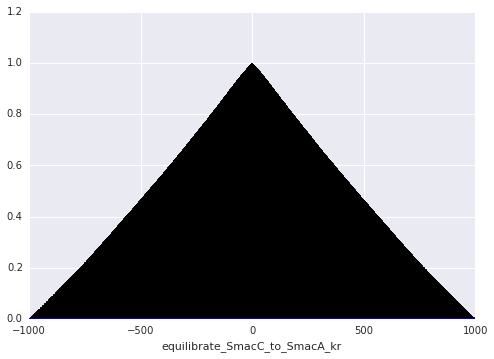

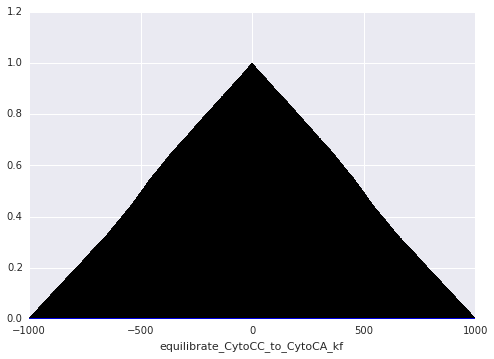

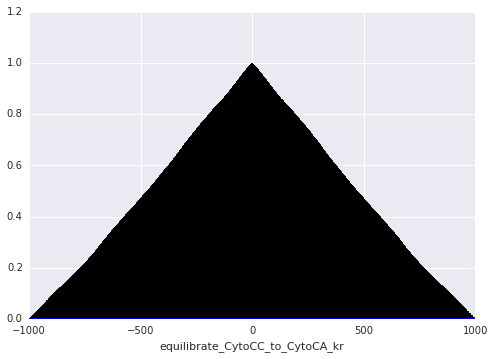

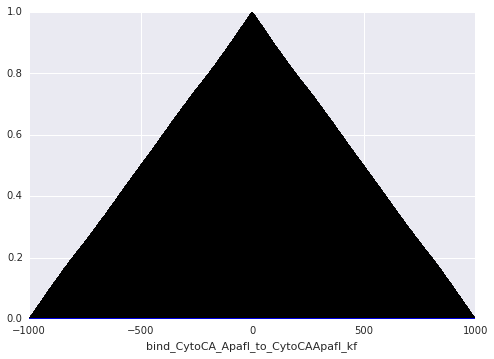

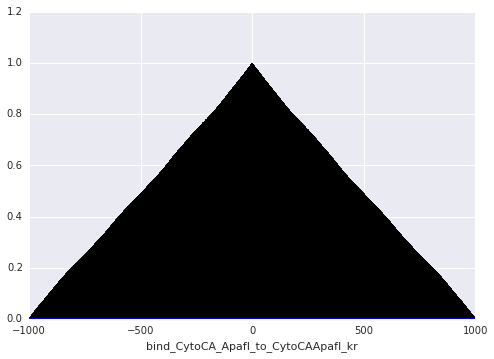

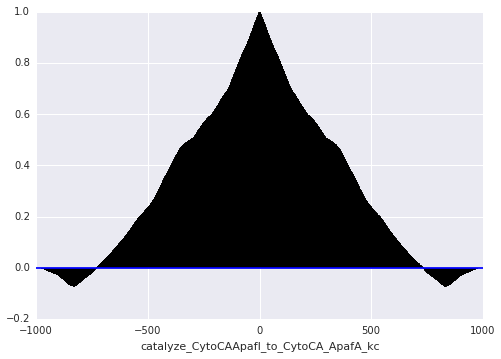

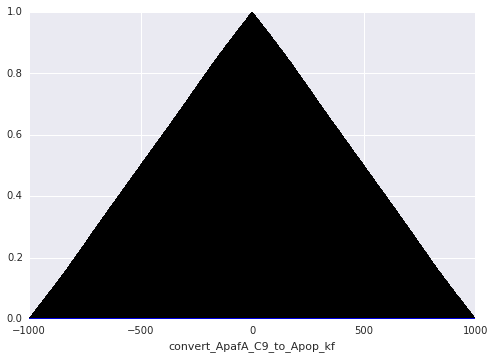

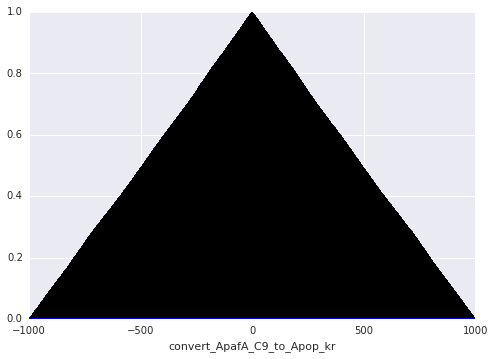

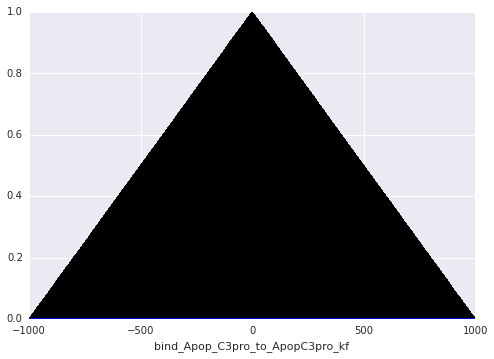

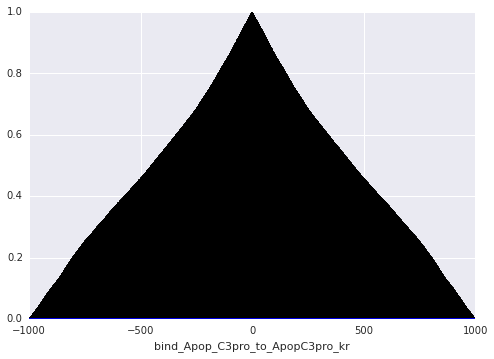

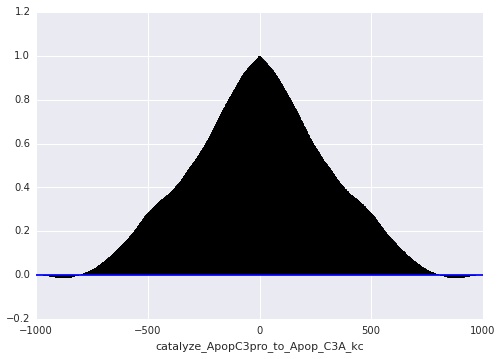

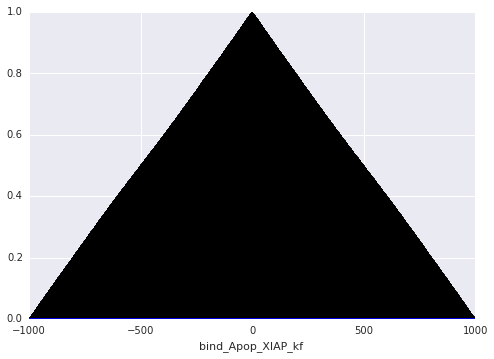

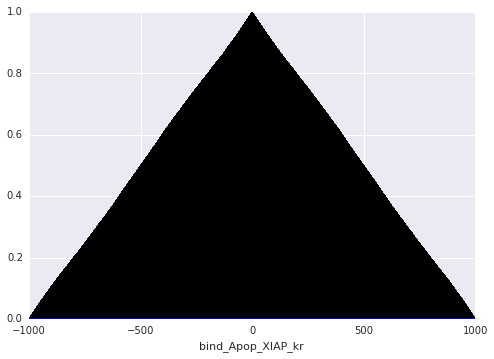

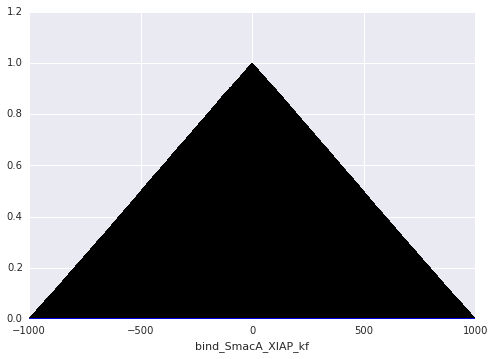

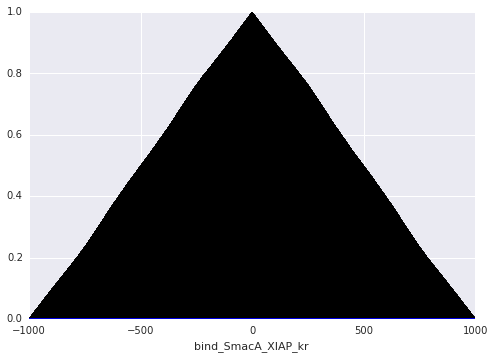

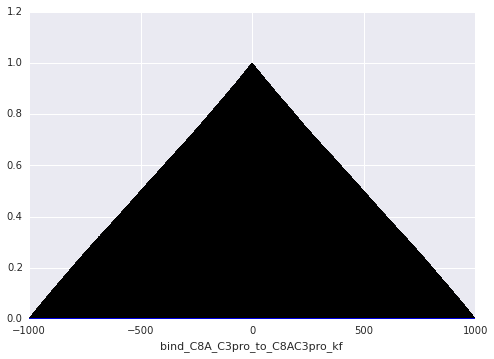

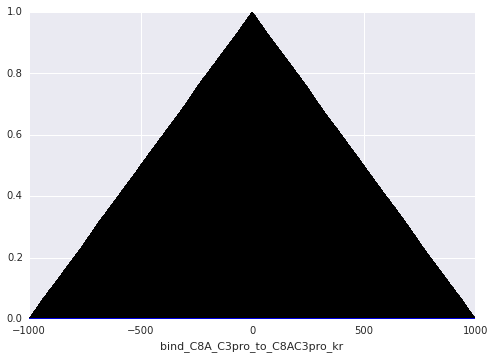

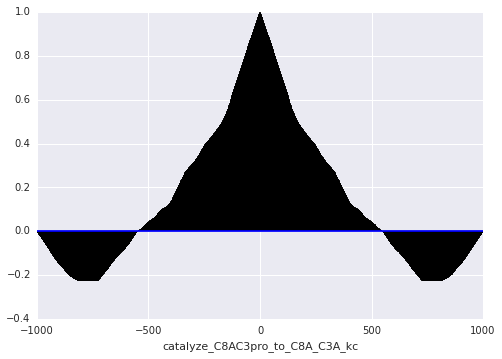

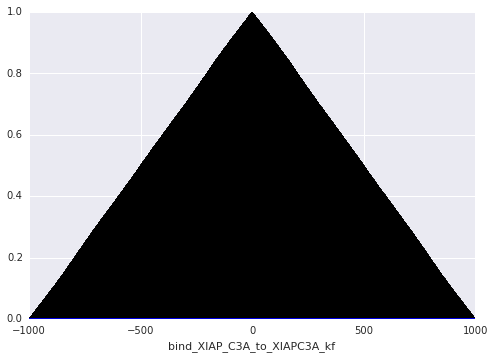

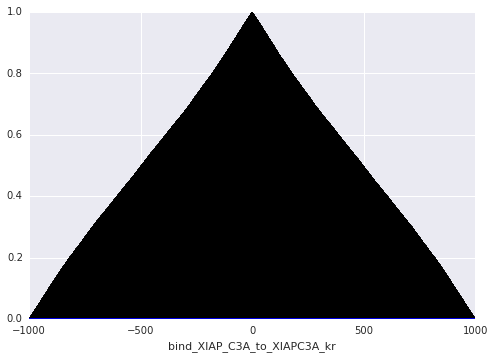

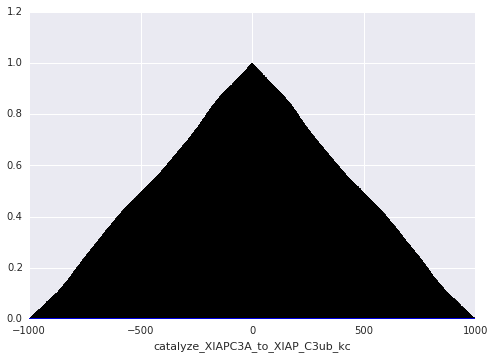

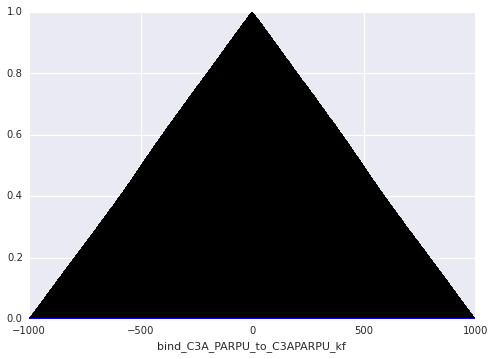

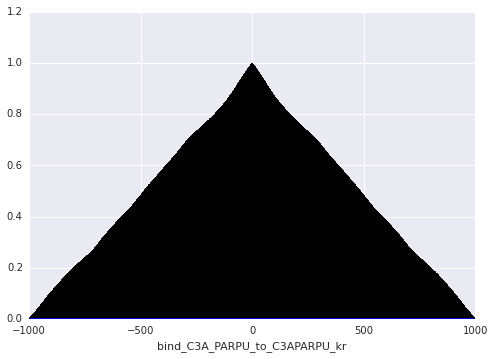

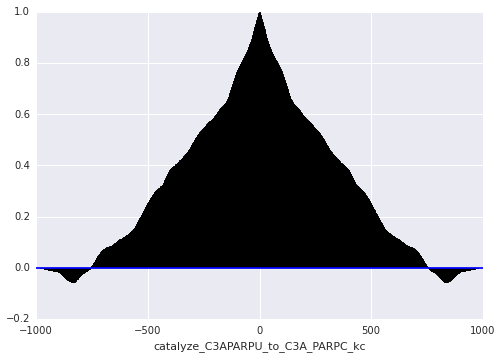

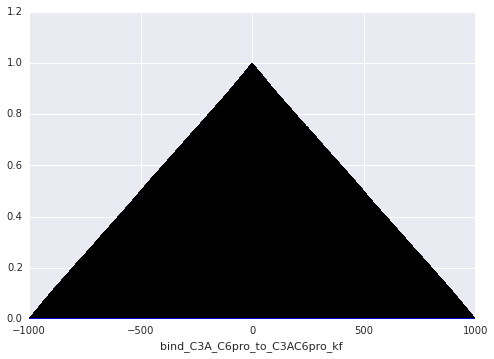

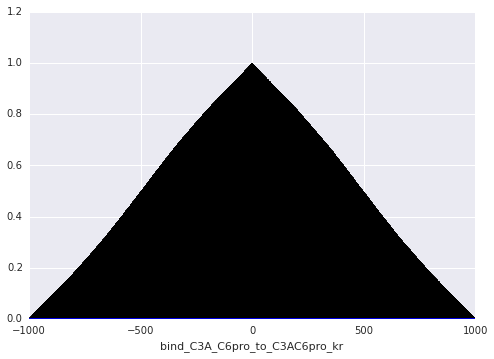

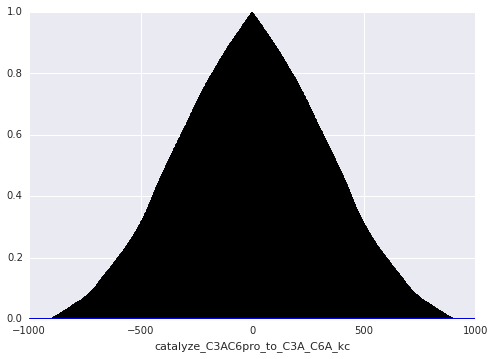

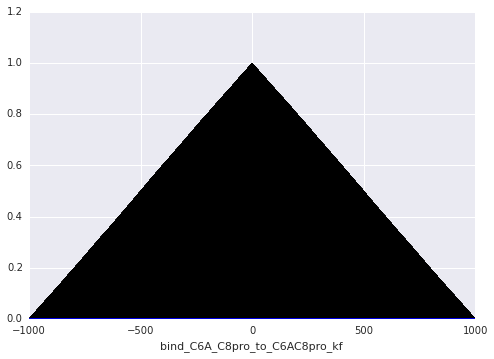

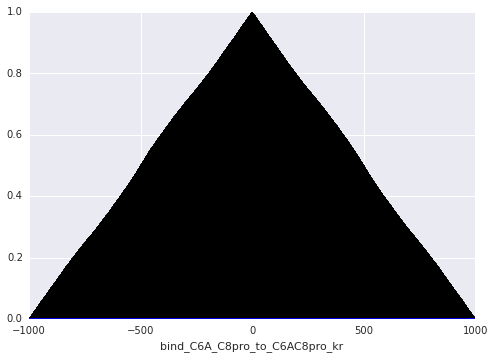

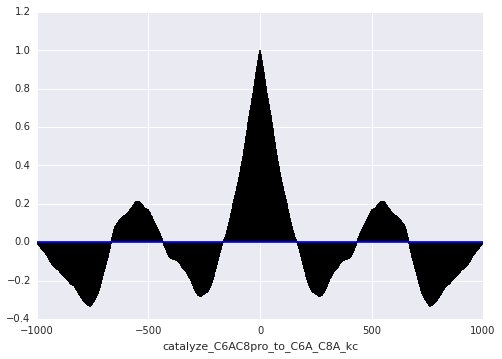

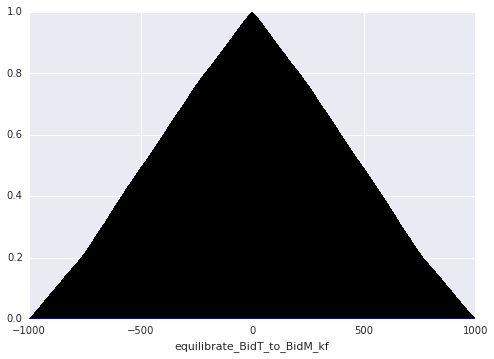

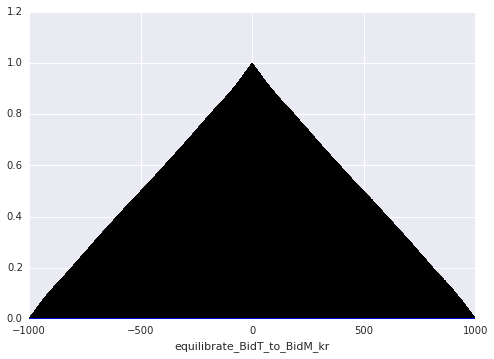

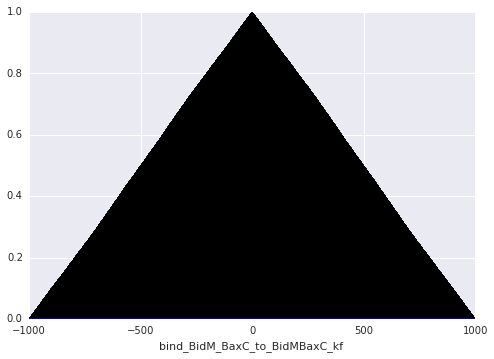

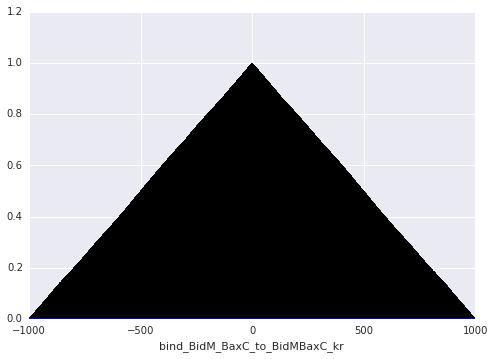

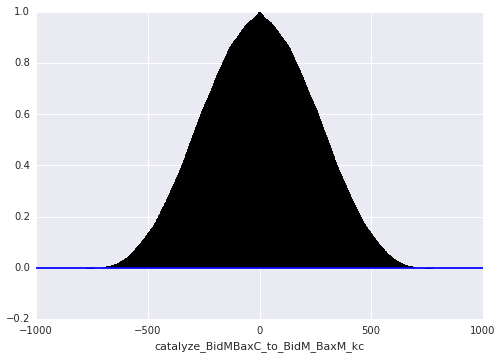

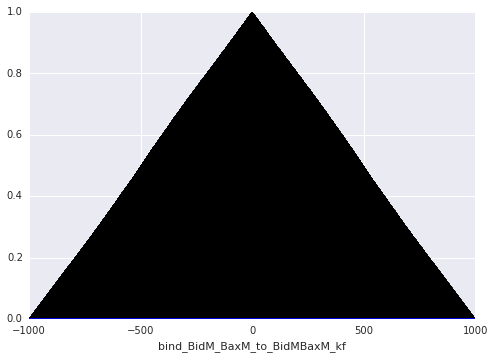

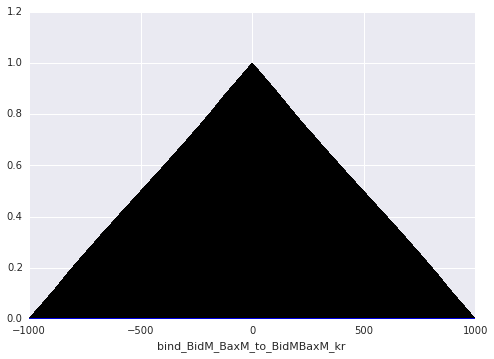

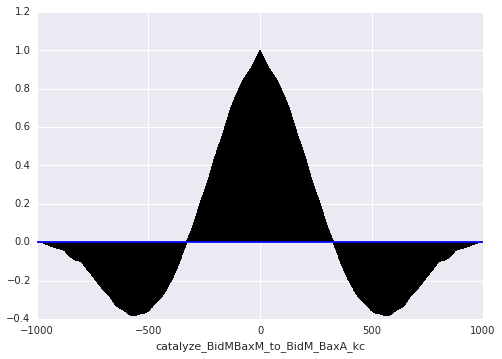

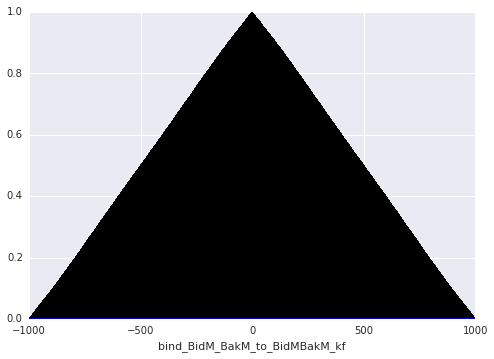

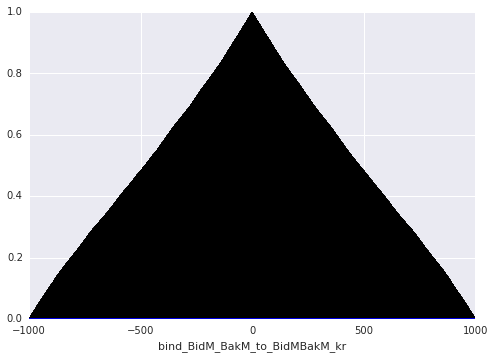

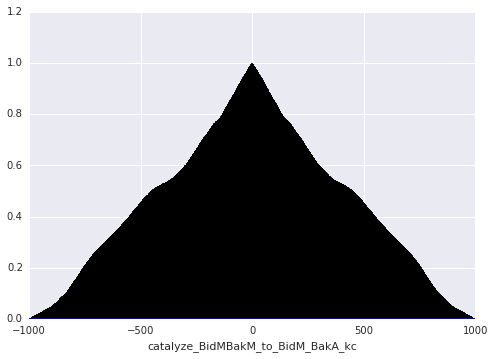

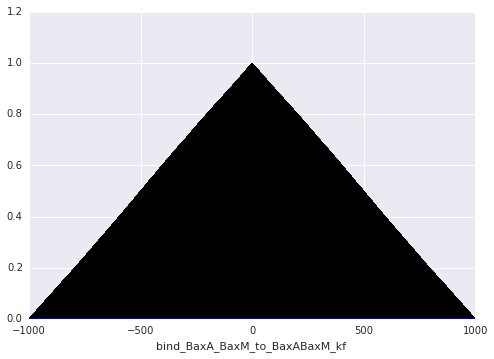

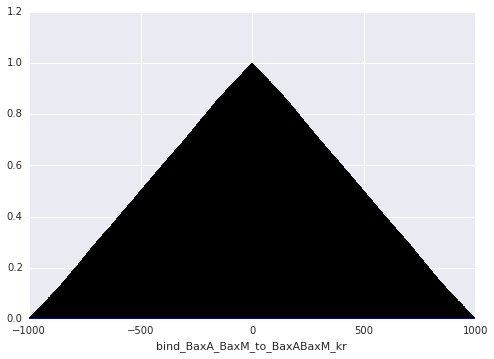

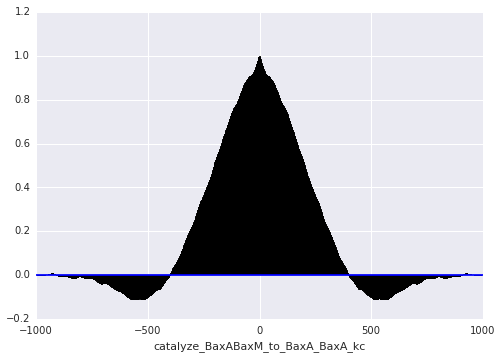

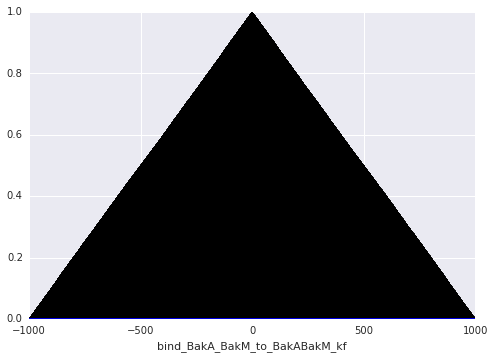

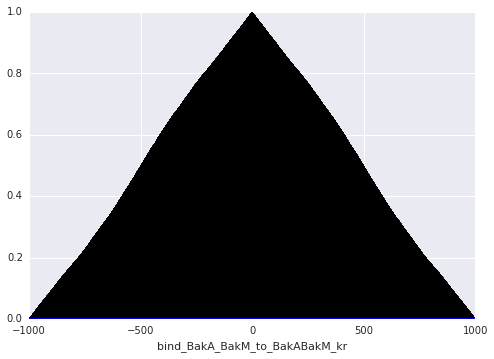

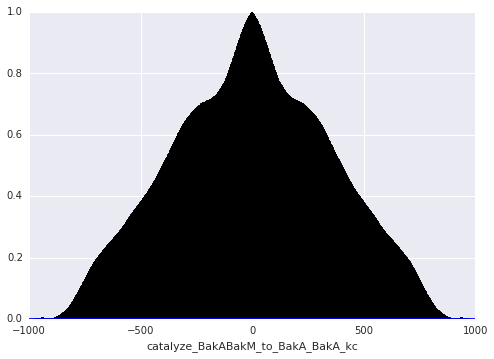

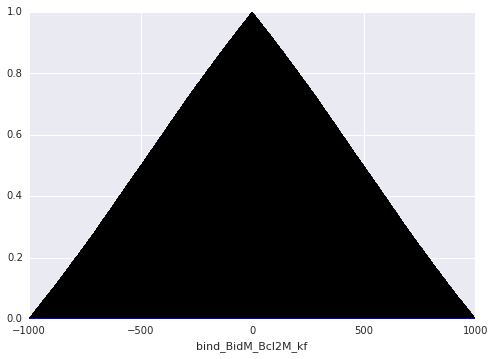

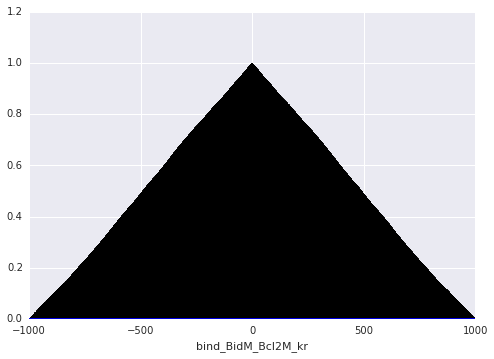

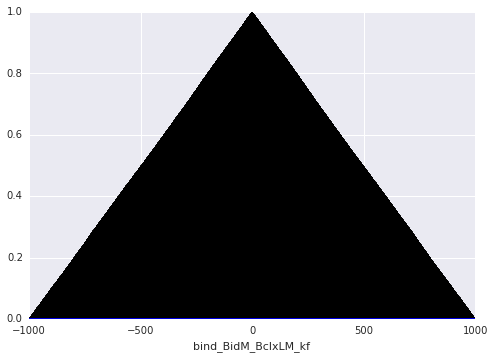

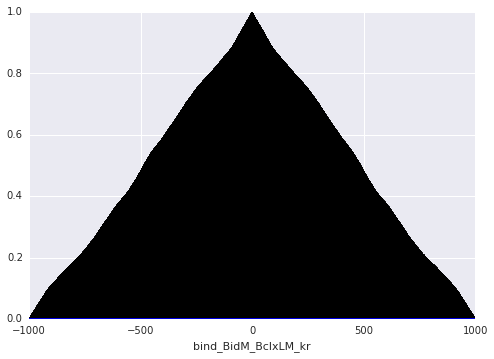

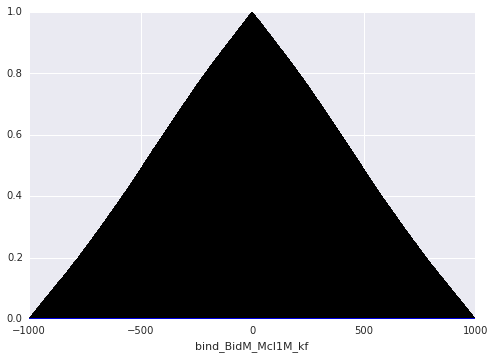

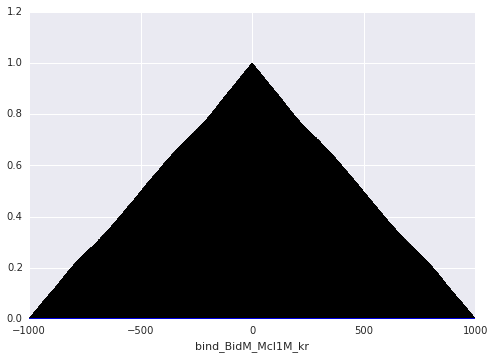

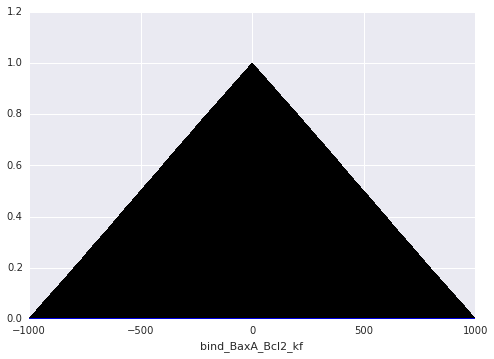

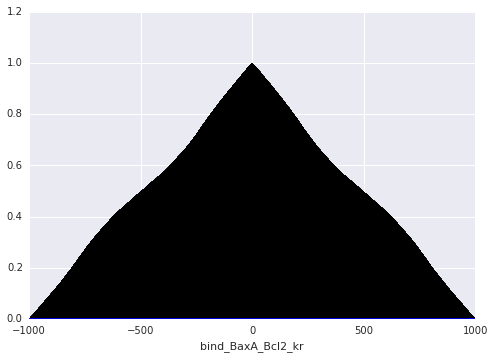

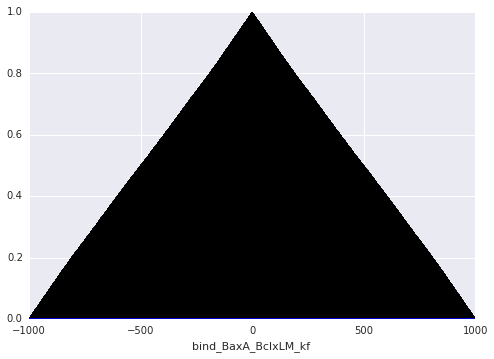

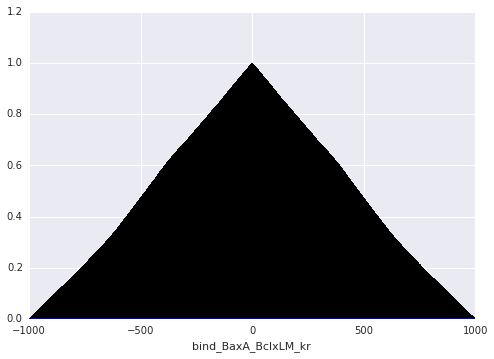

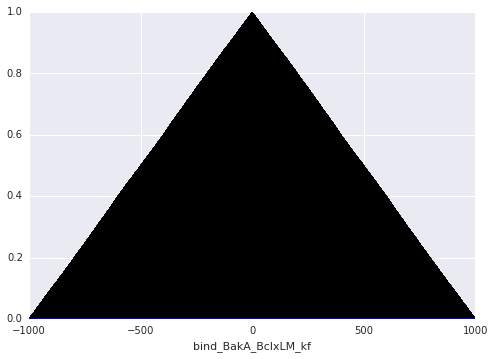

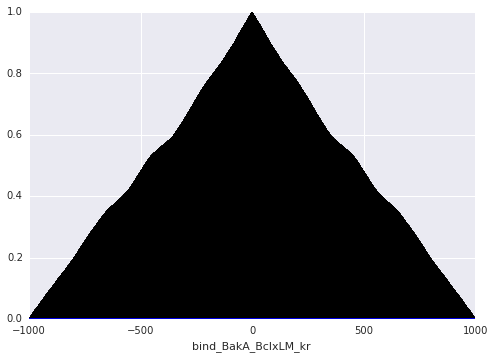

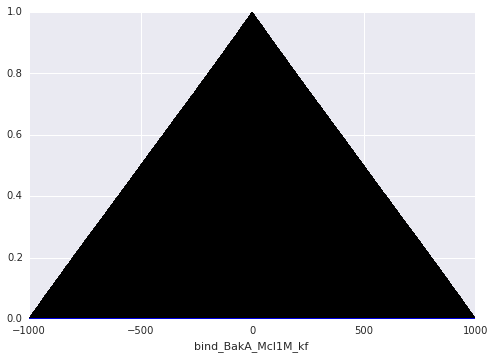

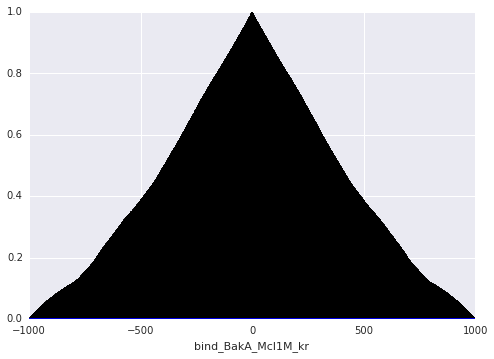

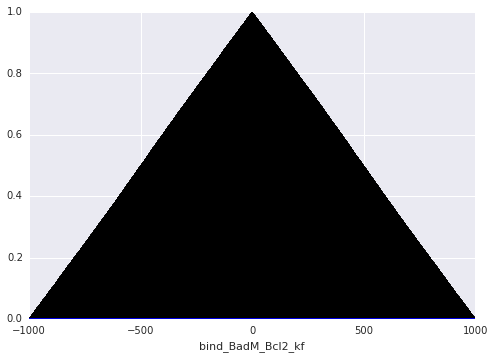

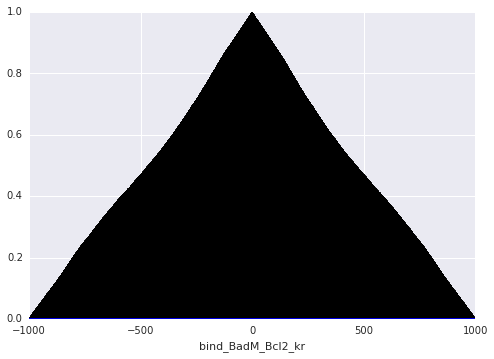

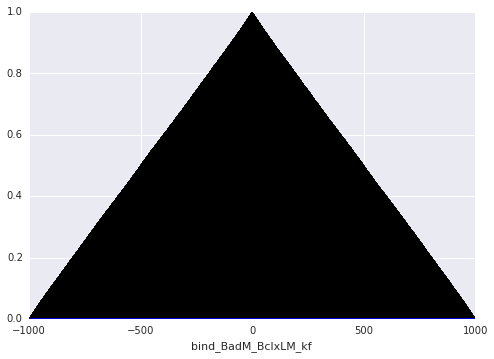

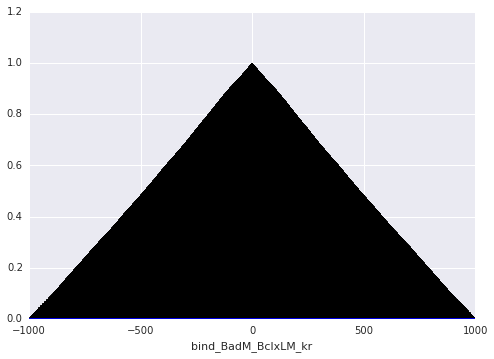

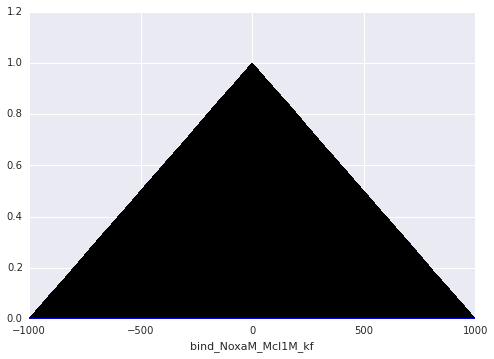

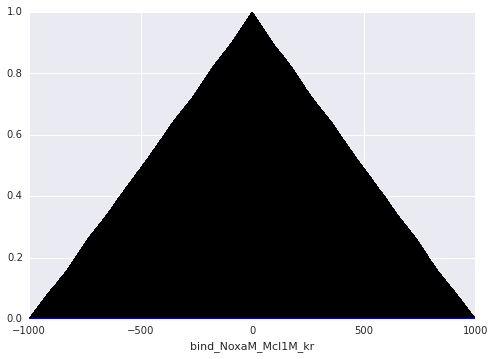

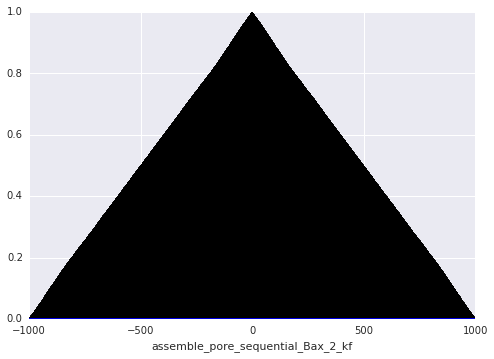

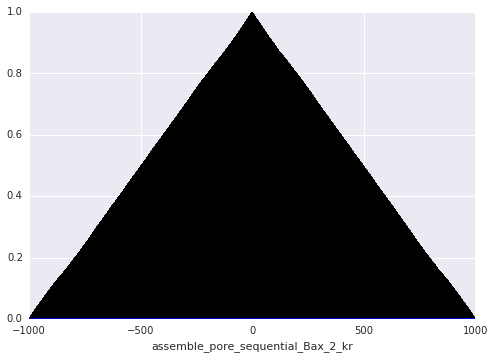

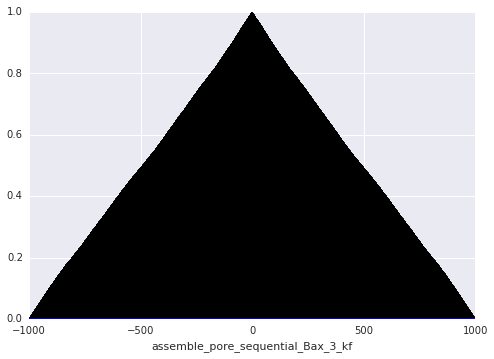

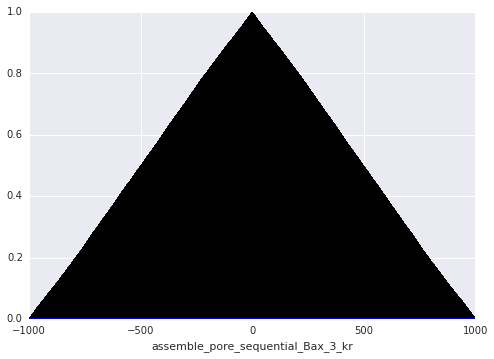

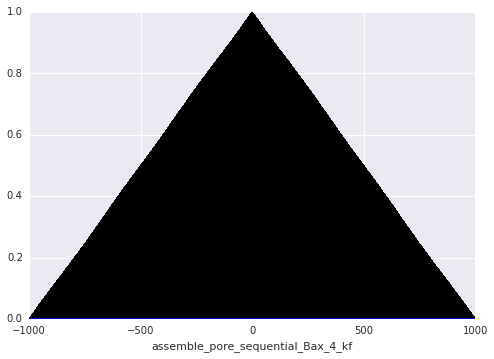

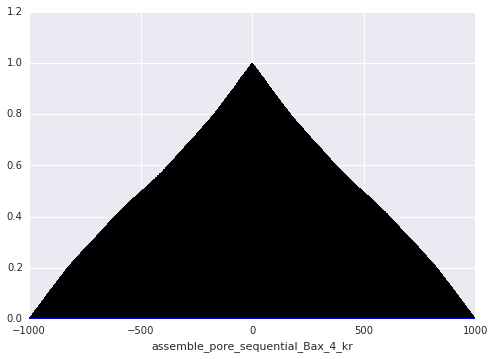

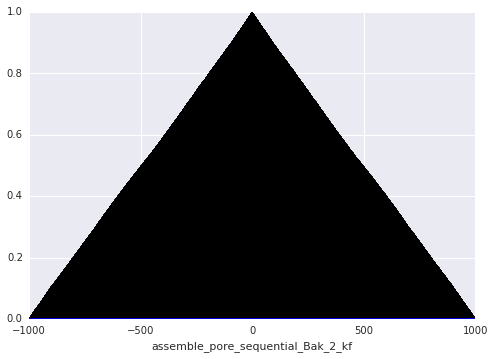

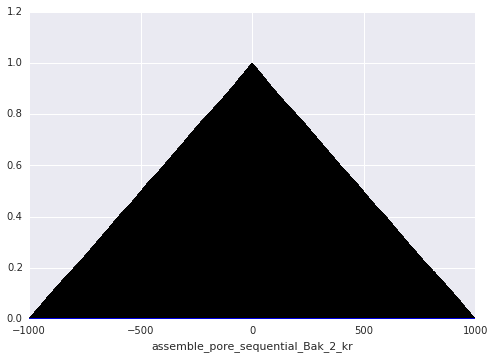

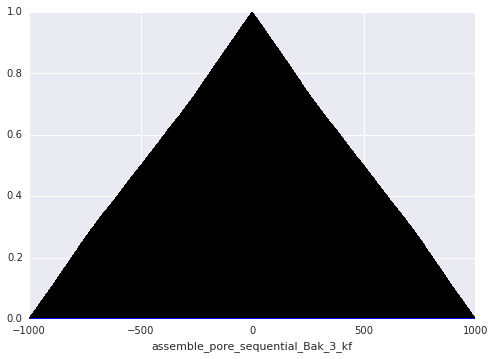

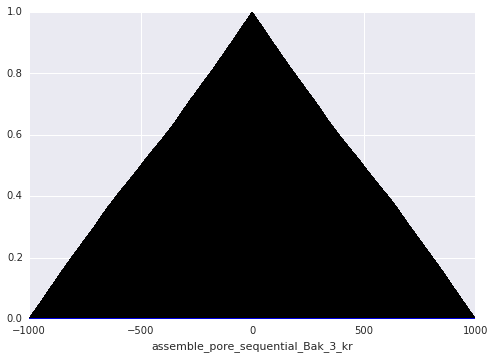

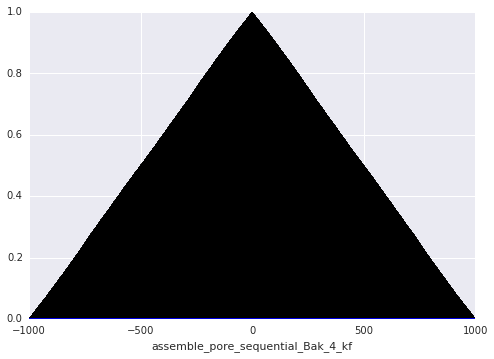

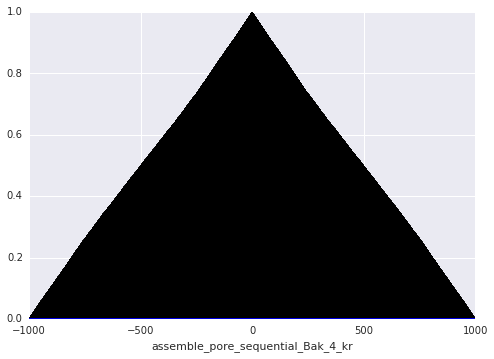

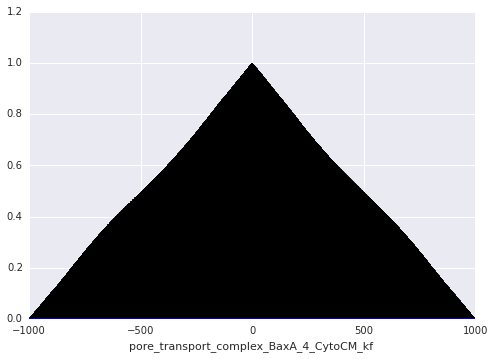

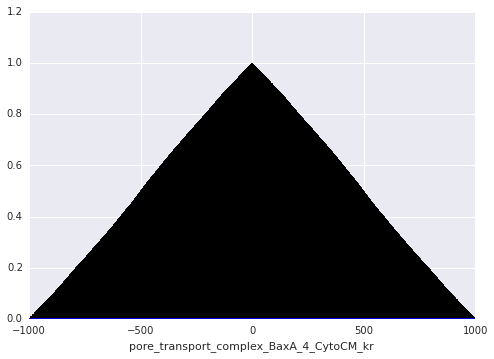

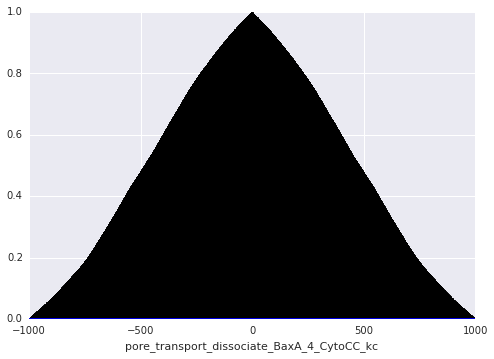

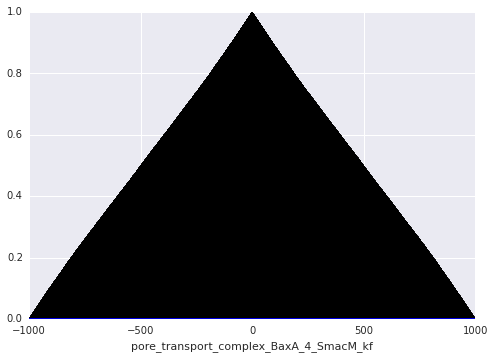

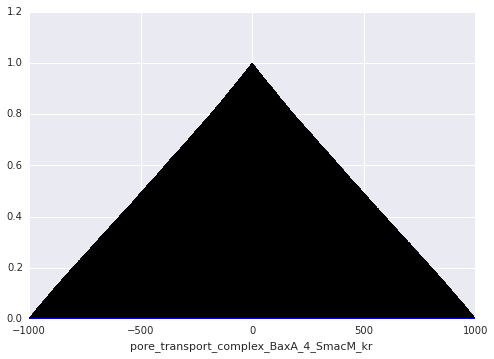

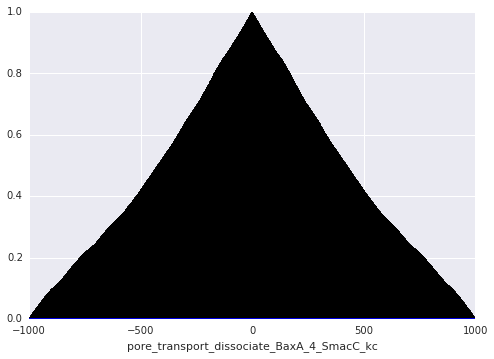

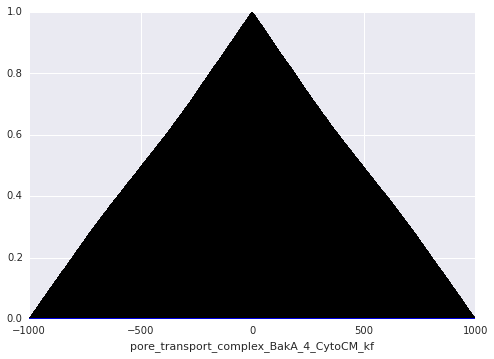

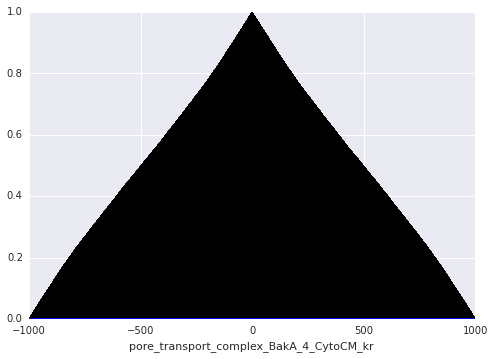

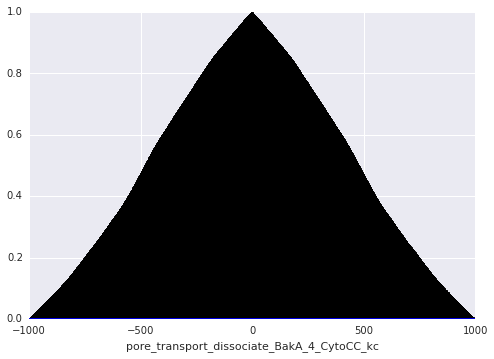

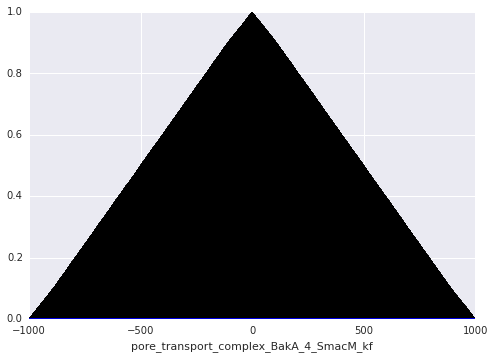

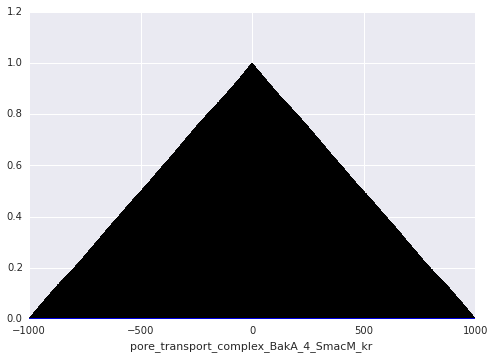

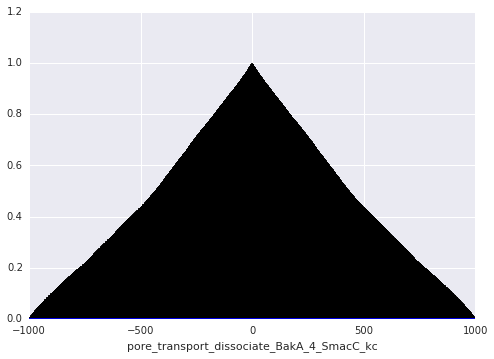

In [16]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][1][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
corner(trace_arr_a[:,50:60:], labels=param_trace_dict_a['param_list'][50:60], bins=10)